<a href="https://colab.research.google.com/github/FedericaSottocasa91/ML-foundations/blob/master/Road_Safety_Accidents_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Esercizio Road Safety - Accidents 2014**

In [ ]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install sklearn
#!pip install seaborn
#!pip install eli5
#!pip install shap
#!pip install catboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import eli5
import shap

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


### **Frame the problem**

Model to predict the probability if a police officer is likely to attend an accident or not

[Web Site](https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) 

[Dataset “2014 Road Safety - Accidents 2014”](http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Accidents_2014.zip)

[Variables explanation](http://data.dft.gov.uk/road-accidents-safety-data/variable%20lookup.xls)

It is a binary classification problem

### **Get the data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DfTRoadSafety_Accidents_2014.csv')
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,201401BS70001,524600,179020,-0.206443,51.496345,1,3,2,1,09/01/2014,5,13:21,12,E09000020,3,315,6,30,0,-1,-1,0,0,0,1,2,2,0,0,1,2,E01002814
1,201401BS70002,525780,178290,-0.189713,51.489523,1,3,2,1,20/01/2014,2,23:00,12,E09000020,3,3218,6,30,5,4,3,3220,0,5,7,1,1,0,0,1,2,E01002894
2,201401BS70003,526880,178430,-0.173827,51.490536,1,3,2,1,21/01/2014,3,10:40,12,E09000020,3,308,6,30,3,4,6,0,0,0,1,1,1,0,0,1,1,E01002822
3,201401BS70004,525580,179080,-0.192311,51.496668,1,3,1,1,15/01/2014,4,17:45,12,E09000020,5,0,6,30,3,4,6,0,0,1,4,1,1,0,0,1,2,E01002812
4,201401BS70006,527040,179030,-0.171308,51.495892,1,3,2,1,09/01/2014,5,08:50,12,E09000020,3,4,6,30,7,4,3,4,0,8,1,1,1,0,0,1,1,E01002821


Collect first dataset info

In [ ]:
df.shape

(146322, 32)

In [ ]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
count,146322.000000,1.463220e+05,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.00000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000,146322.000000
mean,447029.362475,2.903741e+05,-1.328712,52.500882,29.895839,2.836033,1.835179,1.329103,4.09868,343.380537,4.077083,1002.119592,5.160796,38.238611,2.333354,1.853200,2.810234,377.446023,0.008386,0.857725,1.924099,1.500595,1.328132,0.096985,0.069135,1.341951,1.182577
std,95158.326674,1.578227e+05,1.397358,1.421337,25.190838,0.399682,0.700208,0.857469,1.91668,258.280727,1.417408,1791.325195,1.644357,13.850167,2.498027,2.339494,3.193163,1288.061037,0.119877,1.947539,1.627001,1.514131,0.568551,0.685515,0.612831,0.474365,0.386320
min,70951.000000,1.030400e+04,-7.450342,49.913077,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,20.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,384364.250000,1.765900e+05,-2.235527,51.474928,6.000000,3.000000,1.000000,1.000000,2.00000,104.000000,3.000000,0.000000,6.000000,30.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,451306.000000,2.416200e+05,-1.238819,52.055123,30.000000,3.000000,2.000000,1.000000,4.00000,323.000000,3.000000,146.000000,6.000000,30.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,526830.000000,3.911760e+05,-0.170586,53.414623,45.000000,3.000000,2.000000,1.000000,6.00000,517.000000,6.000000,762.000000,6.000000,40.000000,3.000000,4.000000,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000,1.000000
max,655309.000000,1.190858e+06,1.758797,60.597984,98.000000,3.000000,21.000000,93.000000,7.00000,941.000000,6.000000,9999.000000,9.000000,70.000000,9.000000,4.000000,6.000000,9999.000000,2.000000,8.000000,7.000000,9.000000,5.000000,7.000000,7.000000,2.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146322 entries, 0 to 146321
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Accident_Index                               146322 non-null  object 
 1   Location_Easting_OSGR                        146322 non-null  int64  
 2   Location_Northing_OSGR                       146322 non-null  int64  
 3   Longitude                                    146322 non-null  float64
 4   Latitude                                     146322 non-null  float64
 5   Police_Force                                 146322 non-null  int64  
 6   Accident_Severity                            146322 non-null  int64  
 7   Number_of_Vehicles                           146322 non-null  int64  
 8   Number_of_Casualties                         146322 non-null  int64  
 9   Date                                         146322 non-nul

Accident_Index: It is a unique identifier of the records

In [ ]:
df['Accident_Index'].unique().shape

(146322,)

In [ ]:
df.drop('Accident_Index', axis = 1, inplace = True)

Adjust the data type

In [ ]:
no_cat = ['Longitude', 'Latitude', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 'Date', 'Time', 
           'Number_of_Vehicles', 'Number_of_Casualties']

for col in df.columns:
    if col not in no_cat:
        df[col] = df[col].astype("category")

In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146322 entries, 0 to 146321
Data columns (total 31 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Location_Easting_OSGR                        146322 non-null  int64         
 1   Location_Northing_OSGR                       146322 non-null  int64         
 2   Longitude                                    146322 non-null  float64       
 3   Latitude                                     146322 non-null  float64       
 4   Police_Force                                 146322 non-null  category      
 5   Accident_Severity                            146322 non-null  category      
 6   Number_of_Vehicles                           146322 non-null  int64         
 7   Number_of_Casualties                         146322 non-null  int64         
 8   Date                                         146322 non-null  da

#### Missing value & duplicates

In [ ]:
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                              0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Control                                  0
2nd_Road_Cla

The value “-1” is exported for NULL or out of range values so replace -1 with null

In [ ]:
df.replace(-1, np.nan, inplace = True)

Percentage of the missing values per feature



In [ ]:
np.round(df.isnull().sum()/df.shape[0]*100,2)

Location_Easting_OSGR                           0.00
Location_Northing_OSGR                          0.00
Longitude                                       0.00
Latitude                                        0.00
Police_Force                                    0.00
Accident_Severity                               0.00
Number_of_Vehicles                              0.00
Number_of_Casualties                            0.00
Date                                            0.00
Day_of_Week                                     0.00
Time                                            0.00
Local_Authority_(District)                      0.00
Local_Authority_(Highway)                       0.00
1st_Road_Class                                  0.00
1st_Road_Number                                 0.00
Road_Type                                       0.00
Speed_limit                                     0.00
Junction_Detail                                 0.00
Junction_Control                              

In [ ]:
df[df.duplicated()]

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,Junction_Control,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
73850,434640,378410,-1.481677,53.3015,30,3,1,1,2014-11-25,3,06:40:00,327,E10000007,3,61,3,70,0,NaN,NaN,0,0,0,6,1,4,0,0,1,1,E01019795
73851,434640,378410,-1.481677,53.3015,30,3,1,1,2014-11-25,3,06:40:00,327,E10000007,3,61,3,70,0,NaN,NaN,0,0,0,6,1,4,0,0,1,1,E01019795


Drop the duplicates

In [ ]:
df.drop_duplicates(inplace = True)
print('Number of duplicates: ', df[df.duplicated()].shape[0])

Number of duplicates:  0


Drop the features with an important percentage of null values, keep in mind the other four features with null values and decide what to do with them in the exploration step 

In [ ]:
df.drop(['Junction_Control', '2nd_Road_Class', 'LSOA_of_Accident_Location'], axis = 1, inplace = True)

## **Explore the data**

Some useful functions to explore the variables

In [ ]:
def numerical_feature_exploration (feature, bins:int=20):
    """Analysis of a numerical feature"""
    print(feature.name)
    print(feature.describe())
    print("\n")
    print('Null values', pd.isna(feature).sum())
    print('Percentage of Null Values', pd.isna(feature).sum()/feature.shape[0])
    print("\n")
    print('skew', feature.skew())
    print("\n")
    fig, axs = plt.subplots(1, 2, sharex = False, sharey = False)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    plt.subplot(1, 2, 1)
    plt.hist(feature, bins=bins)
    plt.title('Frequency of ' + feature.name + '\n', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.xlabel(feature.name, fontweight='bold')
    plt.subplot(1, 2, 2)
    plt.boxplot(feature)
    plt.title('Boxplot of ' + feature.name + '\n', fontweight='bold')

In [ ]:
def categorical_feature_exploration (feature):
    """Analysis of a categorical feature"""
    print('Number of unique values of ' + feature.name)
    print(feature.nunique())
    print("\n")
    print('Frequency of ' + feature.name)
    print(feature.value_counts())
    print("\n")
    print('Relative Frequency of ' + feature.name)
    print(feature.value_counts(normalize = True))
    print("\n")
    print('Null values', pd.isna(feature).sum())
    print('Percentage of Null Values', pd.isna(feature).sum()/feature.shape[0])
    print("\n")
    counts = feature.value_counts()
    fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
    plt.bar(x = counts.index, height = counts)
    plt.title('Frequency of ' + feature.name + '\n', fontweight='bold')
    plt.ylabel('Frequency', fontweight='bold')
    plt.xlabel(feature.name, fontweight='bold')
    plt.show()

In [ ]:
def categorical_target_exploration (df, feature, target):
    """Analysis of a categorical feature according to the target"""
    crosstab_target = pd.crosstab(df[feature], df[target], normalize = "index").apply(lambda x: np.round(x*100,2))
    print(crosstab_target)
    print('\n\n')
    sns.set_style("whitegrid")
    sns.set_palette(sns.color_palette("muted"), 6)
    fig, ax = plt.subplots(figsize=(8, 4), dpi=100)
    sns.barplot(data=crosstab_target.stack().reset_index(), x=feature, y=0, hue=target)

    plt.title("Police officer attendance at accident by " + feature, fontweight='bold')
    ax.set_xlabel(feature, fontweight='bold')
    ax.set_ylabel("Percentage", fontweight='bold')
    ax.legend(mode='best')
    plt.show()

### Label

Did_Police_Officer_Attend_Scene_of_Accident, from the documentation:

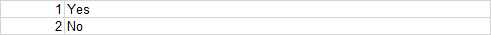

Replace the label 2 with 0

In [ ]:
df.Did_Police_Officer_Attend_Scene_of_Accident.replace(2,0, inplace = True)

Number of unique values of Did_Police_Officer_Attend_Scene_of_Accident
2


Frequency of Did_Police_Officer_Attend_Scene_of_Accident
1    119605
0     26715
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: int64


Relative Frequency of Did_Police_Officer_Attend_Scene_of_Accident
1    0.817421
0    0.182579
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64


Null values 0
Percentage of Null Values 0.0




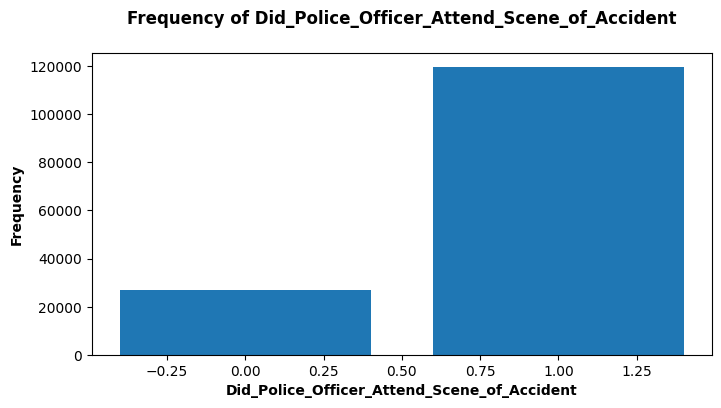

In [ ]:
categorical_feature_exploration(df.Did_Police_Officer_Attend_Scene_of_Accident)

Moderate imbalanced label

### Numerical features

#### Number_of_Vehicles

Number_of_Vehicles
count    146320.000000
mean          1.835190
std           0.700206
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max          21.000000
Name: Number_of_Vehicles, dtype: float64


Null values 0
Percentage of Null Values 0.0


skew 1.627072896276042




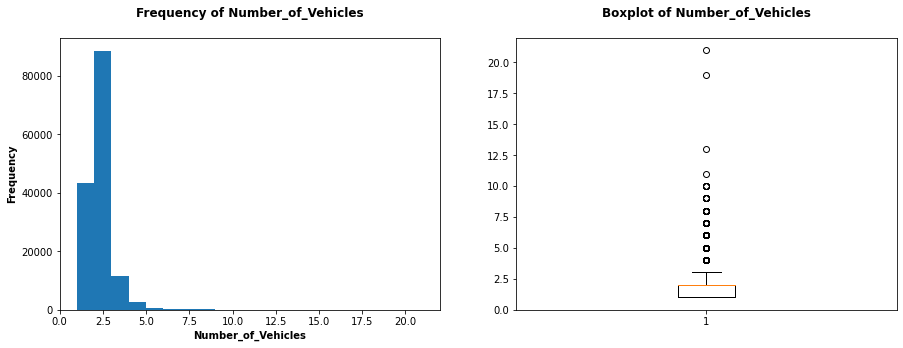

In [ ]:
numerical_feature_exploration(df['Number_of_Vehicles'])

Have a look at the outliers

In [ ]:
df[df.Number_of_Vehicles > 10]

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
26492,358930,509490,-2.635358,54.479104,3,3,11,3,2014-05-12,2,16:57:00,64,E10000006,1,6,3,70,0,0,0,0,1,5,5,0,0,2,1
32724,345990,390290,-2.813919,53.406640,5,2,13,4,2014-01-11,7,06:45:00,90,E08000011,1,57,3,70,0,0,0,0,4,8,4,0,0,2,1
109463,539722,154060,0.001455,51.268514,45,2,19,1,2014-10-05,1,19:05:00,516,E10000030,1,25,3,70,0,0,0,0,6,1,1,0,0,2,1
123086,288976,78472,-3.570024,50.595317,50,2,21,5,2014-03-28,6,08:56:00,585,E10000008,3,380,3,70,0,0,0,0,1,8,4,0,0,2,1


Create a categorical feature from this one because most accidents involve 1 or 2 vehicles, don't drop any outlier (maybe at the second round) because it could happen an accident with so many vehicles

#### Number_of_Casualties

Number_of_Casualties
count    146320.000000
mean          1.329107
std           0.857474
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          93.000000
Name: Number_of_Casualties, dtype: float64


Null values 0
Percentage of Null Values 0.0


skew 20.558788165462396




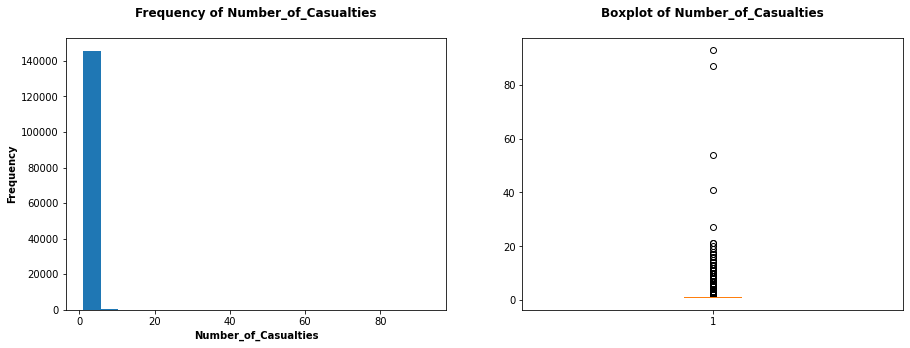

In [ ]:
numerical_feature_exploration(df['Number_of_Casualties'])

Have a look at the outliers, records with more than 80 casualties are strange


In [ ]:
df[df.Number_of_Casualties >= 80]

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,Speed_limit,Junction_Detail,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
44514,418196,552132,-1.718034,54.863663,11,2,2,87,2014-06-03,3,08:22:00,169,E06000047,5,11,6,30,3,693,0,0,1,1,1,0,0,2,1
92044,523000,199780,-0.222211,51.683269,41,2,2,93,2014-10-20,2,08:22:00,33,E10000015,3,1081,6,60,0,0,0,0,1,1,1,0,0,2,1


The accidents above are not outliers because comparing with the vehicles dataset the involved vehicles are both bus.

Create a categorical variables from this one because most values are equal to 1

### Geo features

Latitude and longitude variables

Text(0.5, 1.0, 'Latitude-Longitude Accident Distribution')

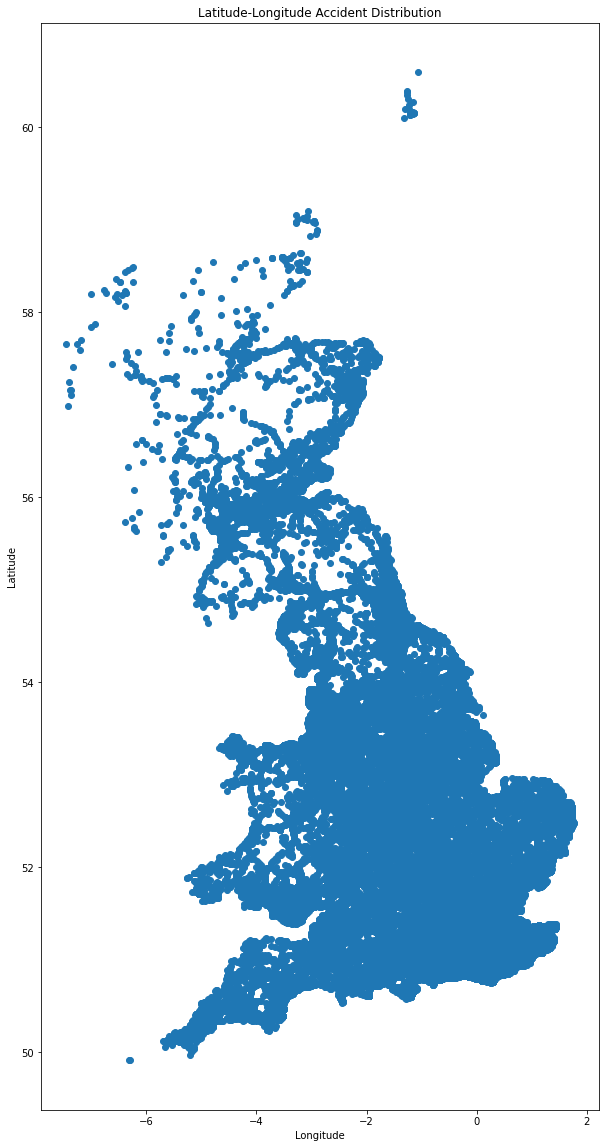

In [ ]:
plt.figure(figsize=(10,20))
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude-Longitude Accident Distribution')

Location_OSGR variables

from wikipedia:
The Ordnance Survey National Grid reference system (also known as British National Grid (BNG)) is a system of geographic grid references used in Great Britain, distinct from latitude and longitude. The Ordnance Survey (OS) devised the national grid reference system, and it is heavily used in their survey data, and in maps based on those surveys, whether published by the Ordnance Survey or by commercial map producers.

Use latitude and longitude as geo variables, so drop the OSGR location variables


In [ ]:
df.drop(['Location_Easting_OSGR', 'Location_Northing_OSGR'], axis = 1, inplace = True)

### Categorical features

#### Police_Force

Police force

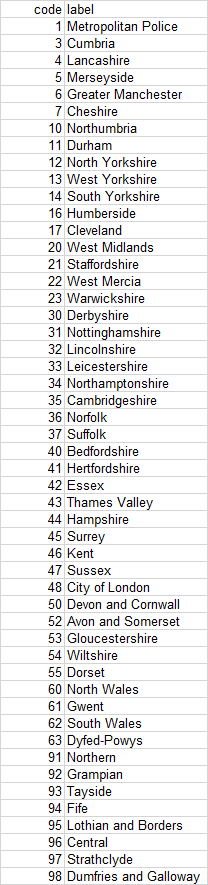

Number of unique values of Police_Force
51


Frequency of Police_Force
1     25682
20     5603
43     5429
46     5279
13     5043
44     4527
47     4297
42     4117
6      4004
50     3967
45     3962
4      3879
97     3650
52     3263
10     3198
14     3168
31     2880
5      2831
21     2799
16     2689
7      2673
41     2634
33     2479
30     2398
62     2328
22     2327
32     2194
95     2160
35     2049
12     2036
36     1882
55     1826
37     1761
23     1653
40     1577
54     1574
60     1415
3      1397
34     1301
63     1249
11     1242
17      889
61      884
53      798
92      778
91      516
93      510
96      454
94      411
48      348
98      310
Name: Police_Force, dtype: int64


Relative Frequency of Police_Force
1     0.175519
20    0.038293
43    0.037104
46    0.036078
13    0.034466
44    0.030939
47    0.029367
42    0.028137
6     0.027365
50    0.027112
45    0.027078
4     0.026510
97    0.024945
52    0.022300
10    0.021856
14    0.021651
31    0

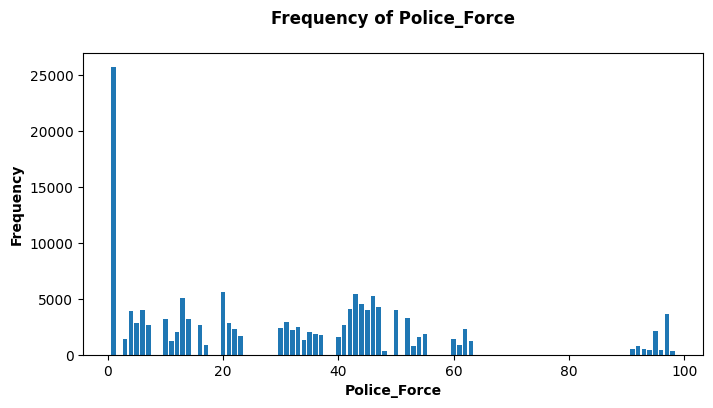

In [ ]:
categorical_feature_exploration(df['Police_Force'])

In [ ]:
pd.crosstab(df[ 'Police_Force'], df['Did_Police_Officer_Attend_Scene_of_Accident'], normalize = "index").apply(lambda x: np.round(x*100,2))

Did_Police_Officer_Attend_Scene_of_Accident,1,0
Police_Force,,
1,82.55,17.45
3,76.31,23.69
4,100.00,0.00
5,81.49,18.51
6,87.59,12.41
7,79.39,20.61
10,74.33,25.67
11,73.19,26.81
12,81.88,18.12


High cardinality, but useful information, police force 4 always attended the accidents

#### Accident_Severity

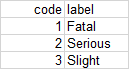

Number of unique values of Accident_Severity
3


Frequency of Accident_Severity
3    123986
2     20676
1      1658
Name: Accident_Severity, dtype: int64


Relative Frequency of Accident_Severity
3    0.847362
2    0.141307
1    0.011331
Name: Accident_Severity, dtype: float64


Null values 0
Percentage of Null Values 0.0




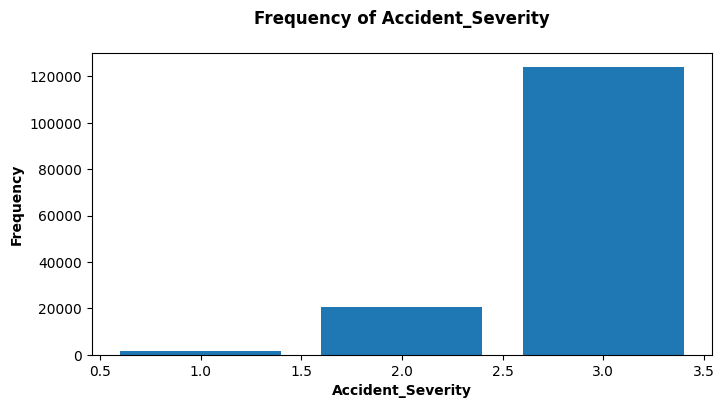

In [ ]:
categorical_feature_exploration(df['Accident_Severity'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Accident_Severity                                        
1                                            98.79   1.21
2                                            90.61   9.39
3                                            80.03  19.97





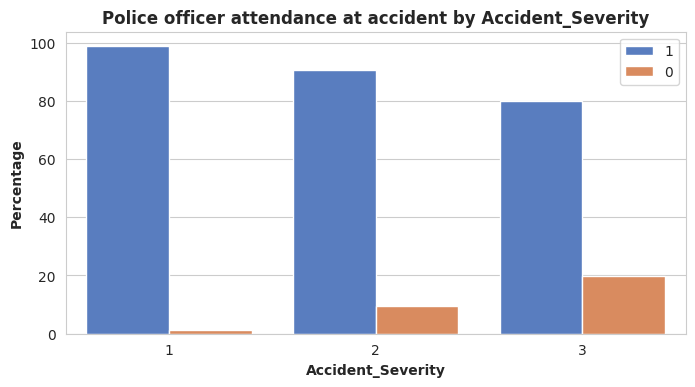

In [ ]:
categorical_target_exploration (df, 'Accident_Severity', 'Did_Police_Officer_Attend_Scene_of_Accident')

As the accident severity decreases also the police attendance decreases

#### Day_of_Week

Day of week

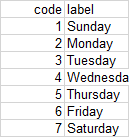

Number of unique values of Day_of_Week
7


Frequency of Day_of_Week
6    23960
3    22316
4    22210
5    21780
2    21093
7    19021
1    15940
Name: Day_of_Week, dtype: int64


Relative Frequency of Day_of_Week
6    0.163751
3    0.152515
4    0.151791
5    0.148852
2    0.144157
7    0.129996
1    0.108939
Name: Day_of_Week, dtype: float64


Null values 0
Percentage of Null Values 0.0




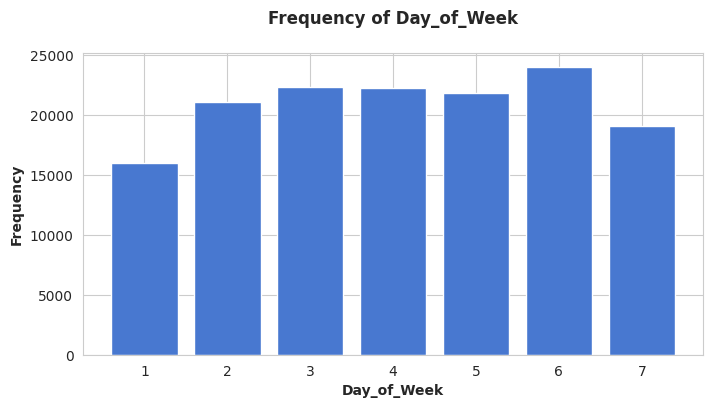

In [ ]:
categorical_feature_exploration(df['Day_of_Week'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Day_of_Week                                              
1                                            85.21  14.79
2                                            81.20  18.80
3                                            80.41  19.59
4                                            80.19  19.81
5                                            81.07  18.93
6                                            81.46  18.54
7                                            83.93  16.07





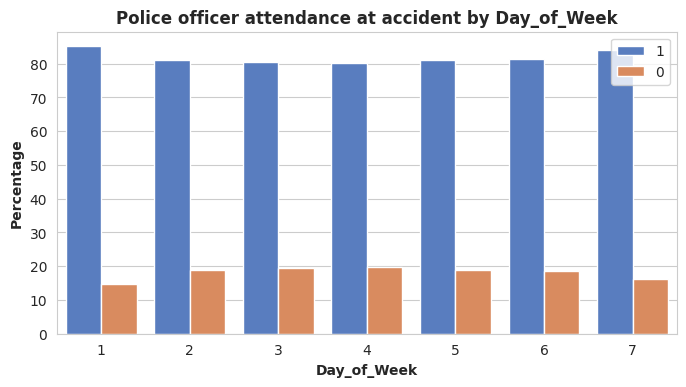

In [ ]:
categorical_target_exploration (df, 'Day_of_Week', 'Did_Police_Officer_Attend_Scene_of_Accident')

Most of 2014 accidents happened on Sunday, the weekend accidents are most attended, it could make sense to create a categorical variable that groups weekdays and weekend days

#### Local Authority Variables

In [ ]:
df['Local_Authority_(District)'].nunique()

380

Too high cardinality, drop it

In [ ]:
df.drop('Local_Authority_(District)', axis = 1, inplace = True)

In [ ]:
df['Local_Authority_(Highway)'].nunique()

207

Too high cardinality, drop it

In [ ]:
df.drop('Local_Authority_(Highway)', axis = 1, inplace = True)

#### 1st_Road_Class

Road class

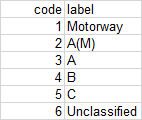

Number of unique values of 1st_Road_Class
6


Frequency of 1st_Road_Class
3    67826
6    41322
4    18573
5    12969
1     5246
2      384
Name: 1st_Road_Class, dtype: int64


Relative Frequency of 1st_Road_Class
3    0.463546
6    0.282408
4    0.126934
5    0.088634
1    0.035853
2    0.002624
Name: 1st_Road_Class, dtype: float64


Null values 0
Percentage of Null Values 0.0




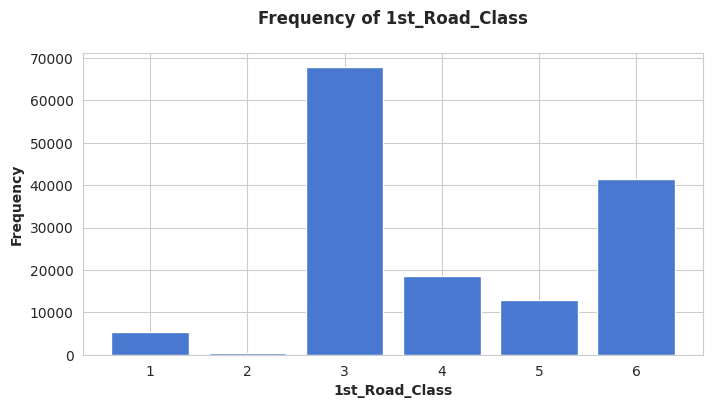

In [ ]:
categorical_feature_exploration(df['1st_Road_Class'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
1st_Road_Class                                           
1                                            92.58   7.42
2                                            92.19   7.81
3                                            83.75  16.25
4                                            82.48  17.52
5                                            81.65  18.35
6                                            76.68  23.32





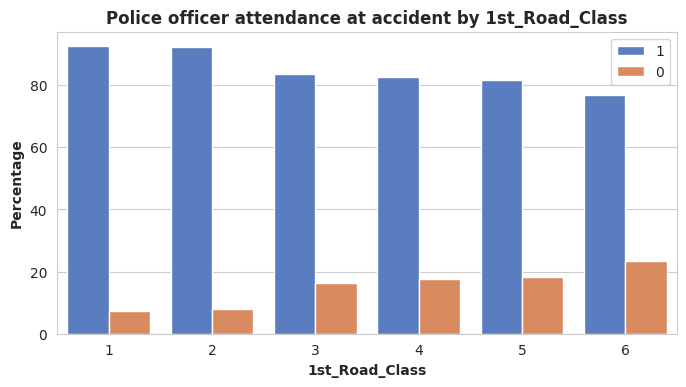

In [ ]:
categorical_target_exploration (df, '1st_Road_Class', 'Did_Police_Officer_Attend_Scene_of_Accident')

Most of 2014 accidents happened on A roads and motorway accidents are more attended

#### Road_Type

Road Type

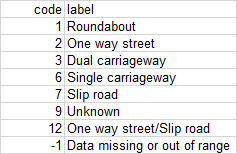

Number of unique values of Road_Type
6


Frequency of Road_Type
6    110187
3     20821
1     10329
2      2935
7      1542
9       506
Name: Road_Type, dtype: int64


Relative Frequency of Road_Type
6    0.753055
3    0.142298
1    0.070592
2    0.020059
7    0.010539
9    0.003458
Name: Road_Type, dtype: float64


Null values 0
Percentage of Null Values 0.0




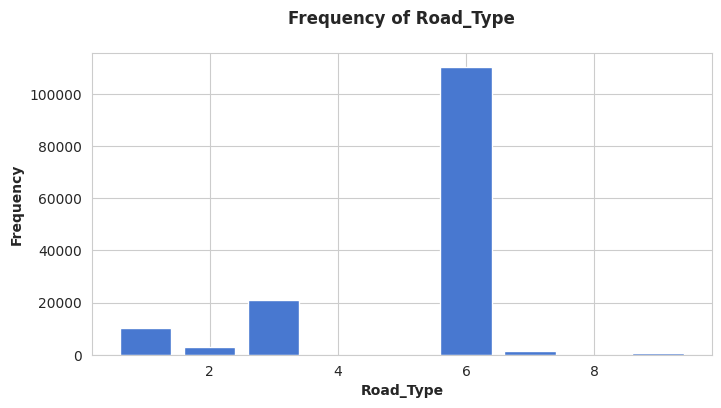

In [ ]:
categorical_feature_exploration(df['Road_Type'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Road_Type                                                
1                                            74.56  25.44
2                                            73.08  26.92
3                                            87.21  12.79
6                                            81.68  18.32
7                                            83.40  16.60
9                                            62.45  37.55





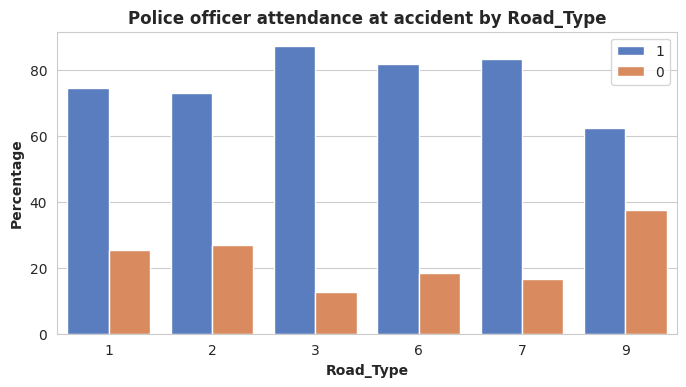

In [ ]:
categorical_target_exploration (df, 'Road_Type', 'Did_Police_Officer_Attend_Scene_of_Accident')

Most of 2014 accidents happened on single carriageway roads and dual cariageway accidents are more attended

#### Road number variables

In [ ]:
df['1st_Road_Number'].nunique()

4384

Too hig cardinality, drop it

In [ ]:
df.drop('1st_Road_Number', axis = 1, inplace = True)

In [ ]:
df['2nd_Road_Number'].nunique()

3868

Too hig cardinality, drop it

In [ ]:
df.drop('2nd_Road_Number', axis = 1, inplace = True)

#### Speed_limit

Speed limit

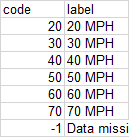

Number of unique values of Speed_limit
6


Frequency of Speed_limit
30    94997
60    20016
40    12017
70    10075
50     5797
20     3418
Name: Speed_limit, dtype: int64


Relative Frequency of Speed_limit
30    0.649241
60    0.136796
40    0.082128
70    0.068856
50    0.039619
20    0.023360
Name: Speed_limit, dtype: float64


Null values 0
Percentage of Null Values 0.0




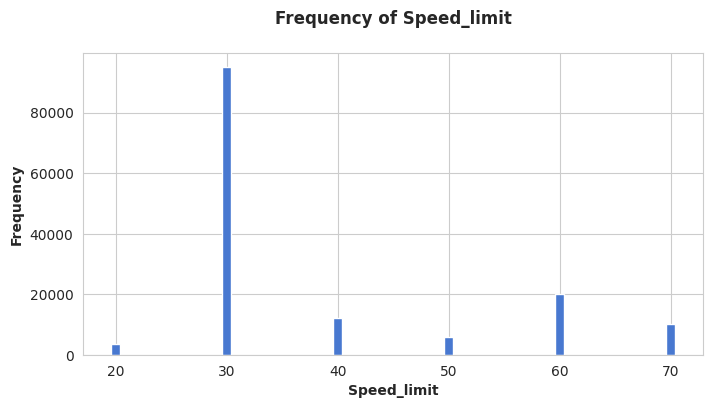

In [ ]:
categorical_feature_exploration(df['Speed_limit'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Speed_limit                                              
20                                           71.33  28.67
30                                           77.78  22.22
40                                           85.63  14.37
50                                           91.19   8.81
60                                           91.70   8.30
70                                           92.80   7.20





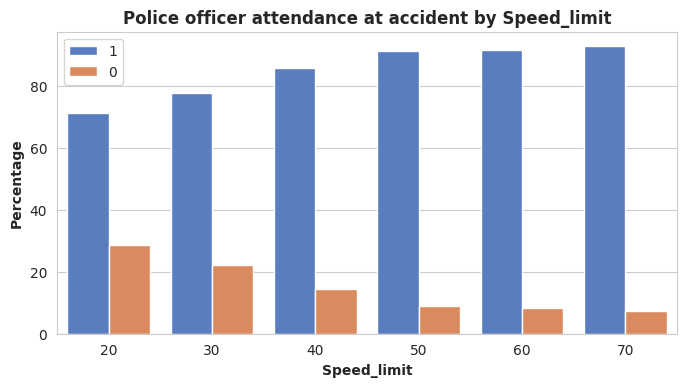

In [ ]:
categorical_target_exploration (df, 'Speed_limit', 'Did_Police_Officer_Attend_Scene_of_Accident')

Most of 2014 accidents happened on 30 speed limit roads and the accidents with higher speed limits are more attended

#### Junction_detail

Junction detail

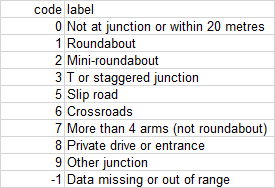

Number of unique values of Junction_Detail
9


Frequency of Junction_Detail
0    56408
3    48014
6    14586
1    13253
8     5883
9     3125
5     2078
2     1956
7     1017
Name: Junction_Detail, dtype: int64


Relative Frequency of Junction_Detail
0    0.385511
3    0.328144
6    0.099686
1    0.090575
8    0.040206
9    0.021357
5    0.014202
2    0.013368
7    0.006951
Name: Junction_Detail, dtype: float64


Null values 0
Percentage of Null Values 0.0




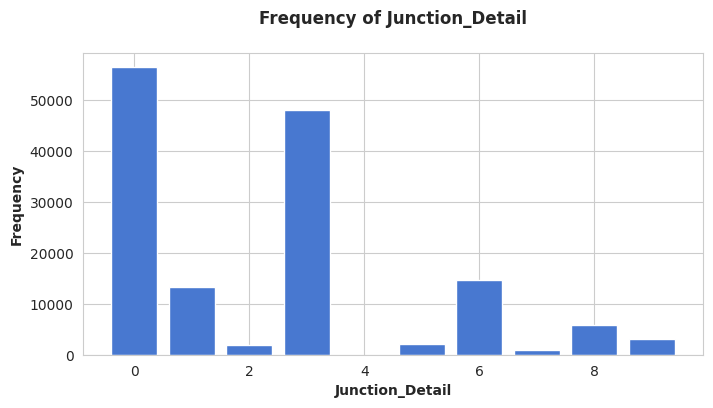

In [ ]:
categorical_feature_exploration(df['Junction_Detail'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Junction_Detail                                          
0                                            83.69  16.31
1                                            73.56  26.44
2                                            76.53  23.47
3                                            81.07  18.93
5                                            88.59  11.41
6                                            84.09  15.91
7                                            81.61  18.39
8                                            80.03  19.97
9                                            82.50  17.50





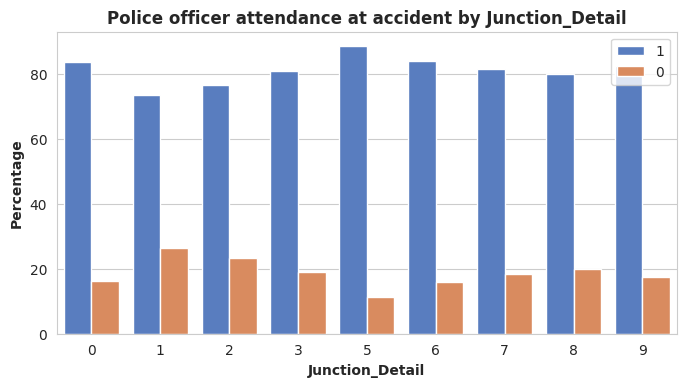

In [ ]:
categorical_target_exploration (df, 'Junction_Detail', 'Did_Police_Officer_Attend_Scene_of_Accident')

It could make sense to create a categorical variable that groups accidents that happened at a junction regardless the types and accidents that not happened at a junction

#### Pedastrian crossing variables

Pedastrian crossing Human Control

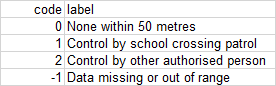

Number of unique values of Pedestrian_Crossing-Human_Control
3


Frequency of Pedestrian_Crossing-Human_Control
0    145536
2       443
1       341
Name: Pedestrian_Crossing-Human_Control, dtype: int64


Relative Frequency of Pedestrian_Crossing-Human_Control
0    0.994642
2    0.003028
1    0.002331
Name: Pedestrian_Crossing-Human_Control, dtype: float64


Null values 0
Percentage of Null Values 0.0




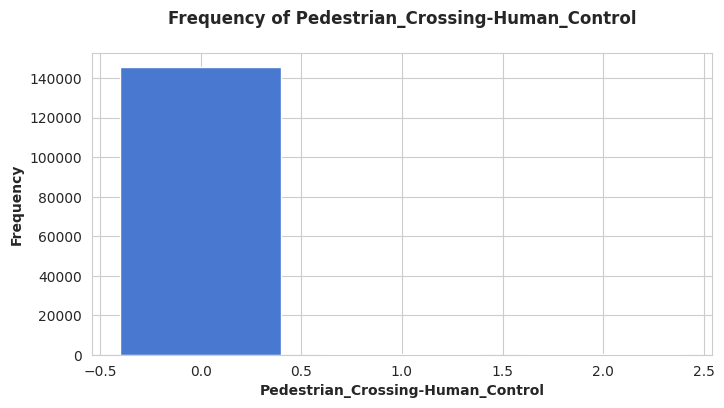

In [ ]:
categorical_feature_exploration(df['Pedestrian_Crossing-Human_Control'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Pedestrian_Crossing-Human_Control                        
0                                            81.76  18.24
1                                            76.54  23.46
2                                            80.81  19.19





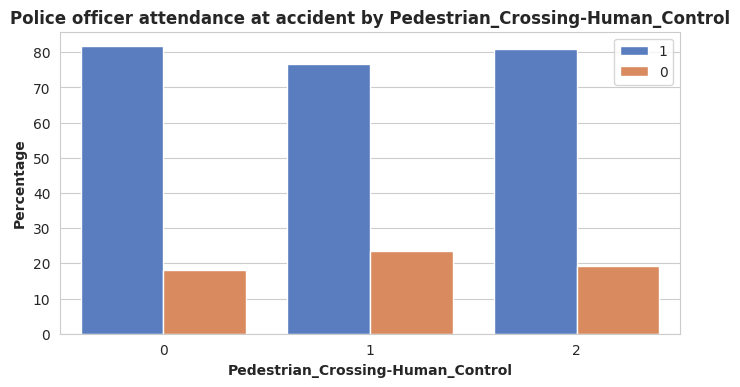

In [ ]:
categorical_target_exploration (df, 'Pedestrian_Crossing-Human_Control', 'Did_Police_Officer_Attend_Scene_of_Accident')

Higly imbalanced feature, 99.4 % of value are equal to none human facilities for pedastrian crossing. It provides little information.

Pedestrian_Crossing-Physical_Facilities

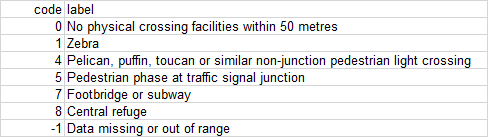

Number of unique values of Pedestrian_Crossing-Physical_Facilities
6


Frequency of Pedestrian_Crossing-Physical_Facilities
0    118106
5     11324
4      8526
1      4519
8      3346
7       499
Name: Pedestrian_Crossing-Physical_Facilities, dtype: int64


Relative Frequency of Pedestrian_Crossing-Physical_Facilities
0    0.807176
5    0.077392
4    0.058270
1    0.030884
8    0.022868
7    0.003410
Name: Pedestrian_Crossing-Physical_Facilities, dtype: float64


Null values 0
Percentage of Null Values 0.0




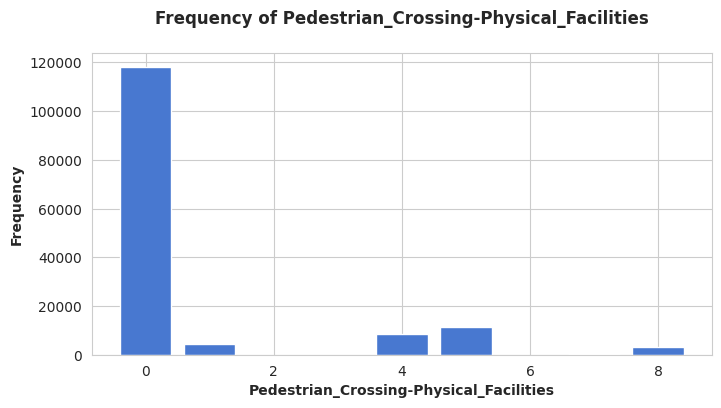

In [ ]:
categorical_feature_exploration(df['Pedestrian_Crossing-Physical_Facilities'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Pedestrian_Crossing-Physical_Facilities                  
0                                            82.30  17.70
1                                            75.55  24.45
4                                            78.63  21.37
5                                            80.48  19.52
7                                            79.56  20.44
8                                            82.90  17.10





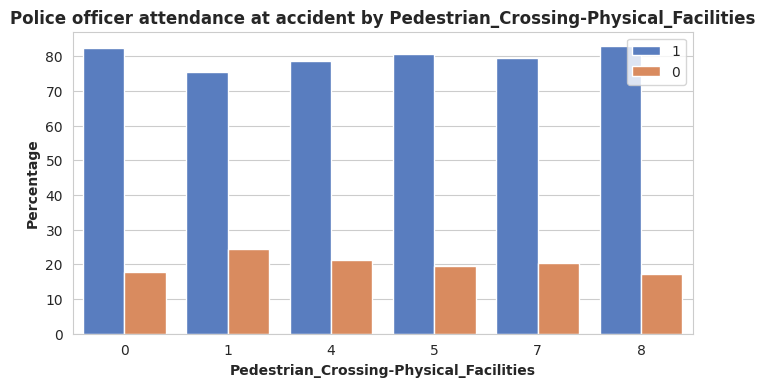

In [ ]:
categorical_target_exploration (df, 'Pedestrian_Crossing-Physical_Facilities', 'Did_Police_Officer_Attend_Scene_of_Accident')

It could make sense to create a categorical variable that groups accidents that happened where there is a pedastrian crossing facilities regardless the types and accidents that  happened where there aren't

#### External condition variables

Light condition

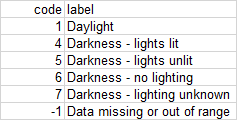

Number of unique values of Light_Conditions
5


Frequency of Light_Conditions
1    108071
4     28449
6      7197
7      1731
5       872
Name: Light_Conditions, dtype: int64


Relative Frequency of Light_Conditions
1    0.738593
4    0.194430
6    0.049187
7    0.011830
5    0.005960
Name: Light_Conditions, dtype: float64


Null values 0
Percentage of Null Values 0.0




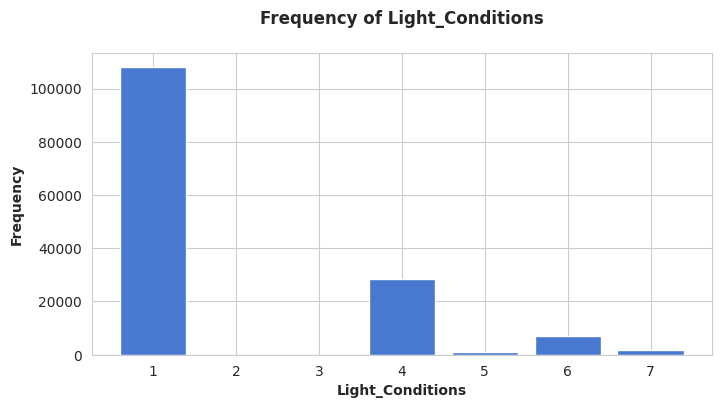

In [ ]:
categorical_feature_exploration(df['Light_Conditions'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Light_Conditions                                         
1                                            80.71  19.29
4                                            83.59  16.41
5                                            86.12  13.88
6                                            94.18   5.82
7                                            61.93  38.07





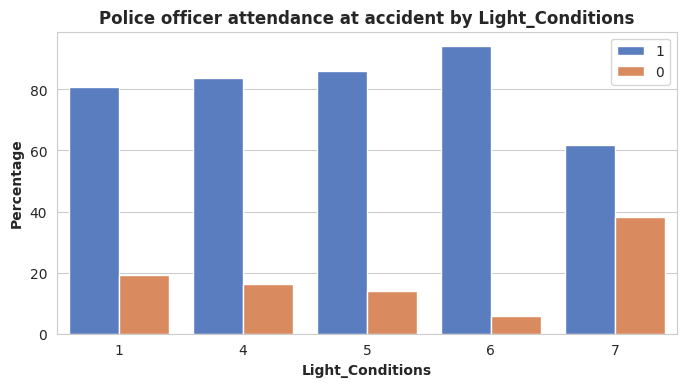

In [ ]:
categorical_target_exploration (df, 'Light_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident')

It could make sense to create a categorical variable that groups accidents that happened with daylight conditions and accidents that  happened with darkness conditions

Wheater condition

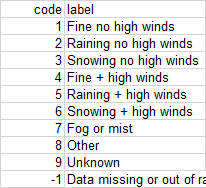

Number of unique values of Weather_Conditions
9


Frequency of Weather_Conditions
1    118877
2     17665
9      2480
5      2333
8      2332
4      1575
7       753
3       227
6        78
Name: Weather_Conditions, dtype: int64


Relative Frequency of Weather_Conditions
1    0.812445
2    0.120729
9    0.016949
5    0.015945
8    0.015938
4    0.010764
7    0.005146
3    0.001551
6    0.000533
Name: Weather_Conditions, dtype: float64


Null values 0
Percentage of Null Values 0.0




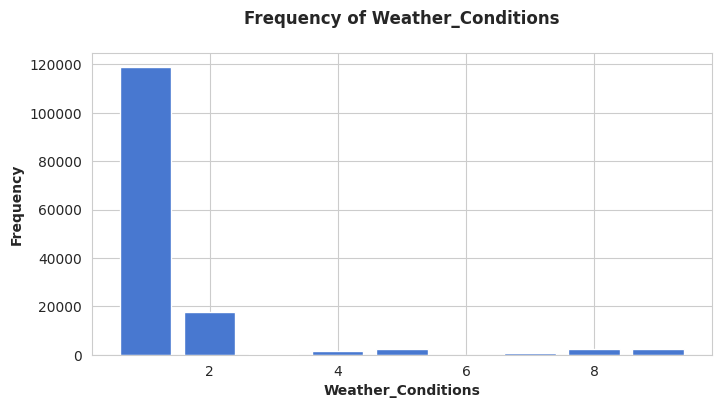

In [ ]:
categorical_feature_exploration(df['Weather_Conditions'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Weather_Conditions                                       
1                                            81.75  18.25
2                                            85.73  14.27
3                                            84.58  15.42
4                                            86.35  13.65
5                                            87.36  12.64
6                                            85.90  14.10
7                                            88.58  11.42
8                                            81.69  18.31
9                                            42.10  57.90





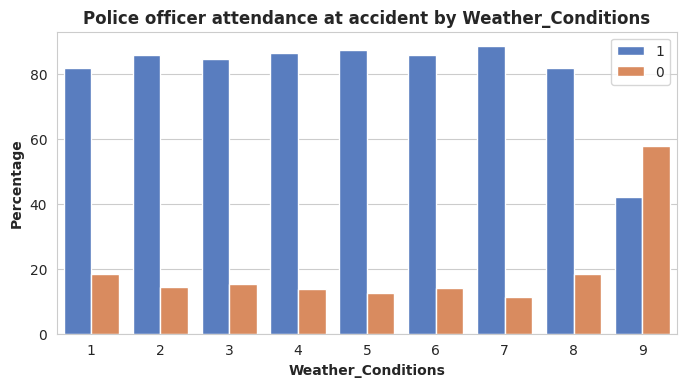

In [ ]:
categorical_target_exploration (df, 'Weather_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident')

It could make sense to create a categorical variable that groups accidents that happened with good weather conditions and accidents that  happened with bad weather conditions

#### Road_Surface_Conditions

Road surface


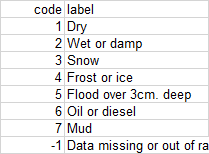

Number of unique values of Road_Surface_Conditions
5


Frequency of Road_Surface_Conditions
1    102019
2     41921
4      1690
5       262
3       206
Name: Road_Surface_Conditions, dtype: int64


Relative Frequency of Road_Surface_Conditions
1    0.698292
2    0.286938
4    0.011568
5    0.001793
3    0.001410
Name: Road_Surface_Conditions, dtype: float64


Null values 222
Percentage of Null Values 0.0015172225259704757




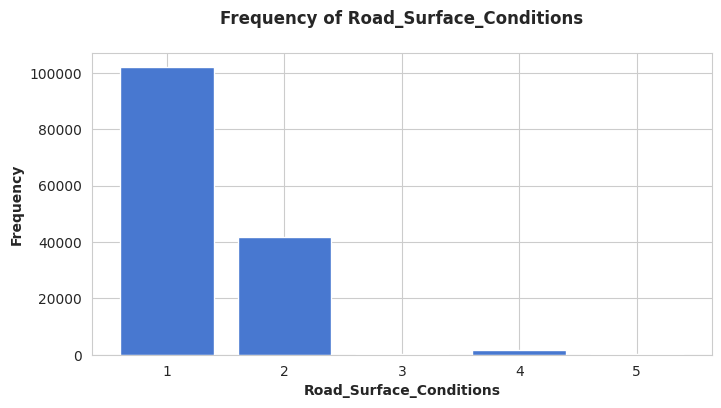

In [ ]:
categorical_feature_exploration(df['Road_Surface_Conditions'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Road_Surface_Conditions                                  
1                                            79.83  20.17
2                                            86.26  13.74
3                                            82.52  17.48
4                                            91.24   8.76
5                                            93.51   6.49





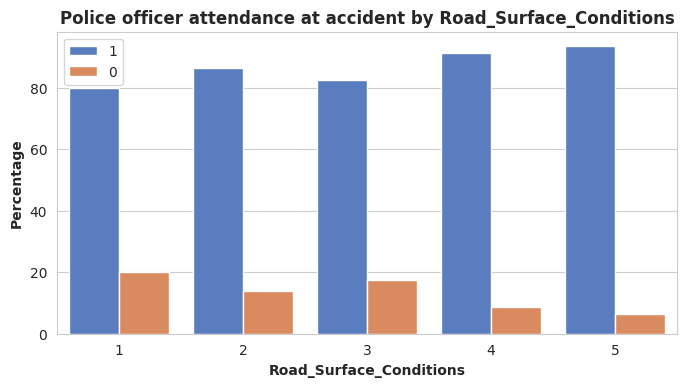

In [ ]:
categorical_target_exploration (df, 'Road_Surface_Conditions', 'Did_Police_Officer_Attend_Scene_of_Accident')

Keep this attributes that could be useful and fill the 222 rown with null values

In [ ]:
df['Road_Surface_Conditions'].fillna(value = 1, inplace = True)

Most of 2014 accidents happened on dry roads and accidents with flood and ice on roads are more attended

#### Special_Conditions_at_Site

Special condition

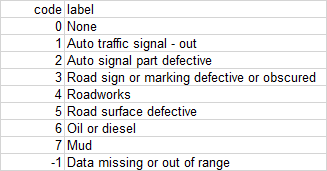

Number of unique values of Special_Conditions_at_Site
8


Frequency of Special_Conditions_at_Site
0    143114
4      1562
6       401
7       390
5       372
1       219
3       207
2        54
Name: Special_Conditions_at_Site, dtype: int64


Relative Frequency of Special_Conditions_at_Site
0    0.978096
4    0.010675
6    0.002741
7    0.002665
5    0.002542
1    0.001497
3    0.001415
2    0.000369
Name: Special_Conditions_at_Site, dtype: float64


Null values 1
Percentage of Null Values 6.83433570256971e-06




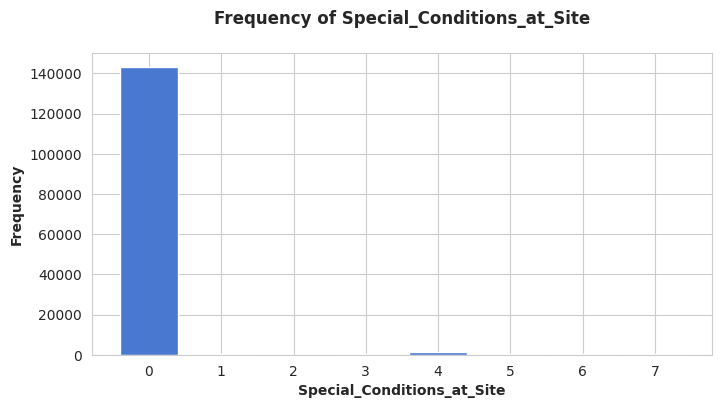

In [ ]:
categorical_feature_exploration(df['Special_Conditions_at_Site'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Special_Conditions_at_Site                               
0                                            81.64  18.36
1                                            85.39  14.61
2                                            94.44   5.56
3                                            91.79   8.21
4                                            83.48  16.52
5                                            88.98  11.02
6                                            90.77   9.23
7                                            88.72  11.28





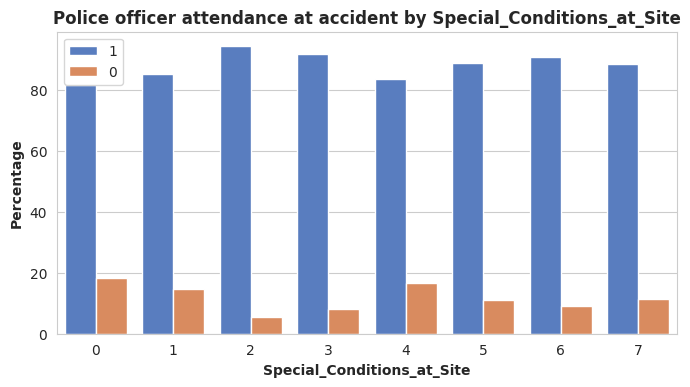

In [ ]:
categorical_target_exploration (df, 'Special_Conditions_at_Site', 'Did_Police_Officer_Attend_Scene_of_Accident')

In [ ]:
df['Special_Conditions_at_Site'].fillna(value = 0, inplace = True)

Higly imbalanced feature, 97.8 % of values are equal to no special conditions. It provides little information.

#### Carriageway_Hazards

Carriageway_Hazards 

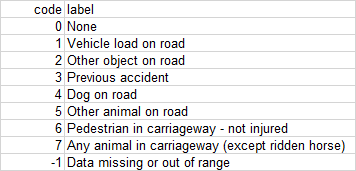

Number of unique values of Carriageway_Hazards
6


Frequency of Carriageway_Hazards
0    143907
2       939
7       692
6       450
3       182
1       149
Name: Carriageway_Hazards, dtype: int64


Relative Frequency of Carriageway_Hazards
0    0.983515
2    0.006417
7    0.004729
6    0.003075
3    0.001244
1    0.001018
Name: Carriageway_Hazards, dtype: float64


Null values 1
Percentage of Null Values 6.83433570256971e-06




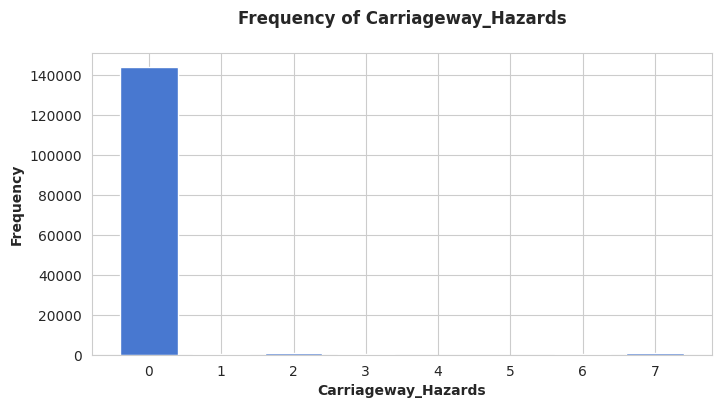

In [ ]:
categorical_feature_exploration(df['Carriageway_Hazards'])

In [ ]:
df['Carriageway_Hazards'].fillna(value = 0, inplace = True)

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Carriageway_Hazards                                      
0                                            81.67  18.33
1                                            82.55  17.45
2                                            86.26  13.74
3                                            92.86   7.14
6                                            78.67  21.33
7                                            89.31  10.69





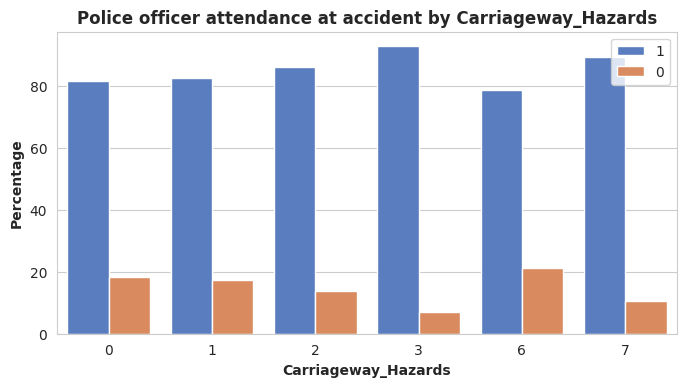

In [ ]:
categorical_target_exploration (df, 'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident')

Higly imbalanced feature, 98,3 % of values are equal to no hazards. It provides little information.

#### Urban_or_Rural_Area

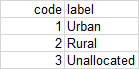

Number of unique values of Urban_or_Rural_Area
2


Frequency of Urban_or_Rural_Area
1    96285
2    50035
Name: Urban_or_Rural_Area, dtype: int64


Relative Frequency of Urban_or_Rural_Area
1    0.658044
2    0.341956
Name: Urban_or_Rural_Area, dtype: float64


Null values 0
Percentage of Null Values 0.0




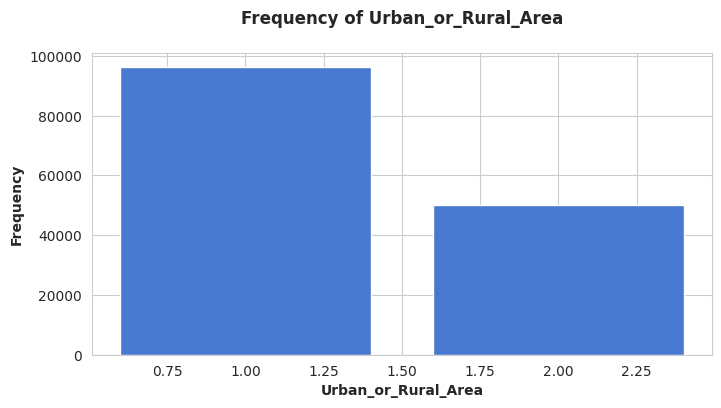

In [ ]:
categorical_feature_exploration(df['Urban_or_Rural_Area'])

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Urban_or_Rural_Area                                      
1                                            78.38  21.62
2                                            88.21  11.79





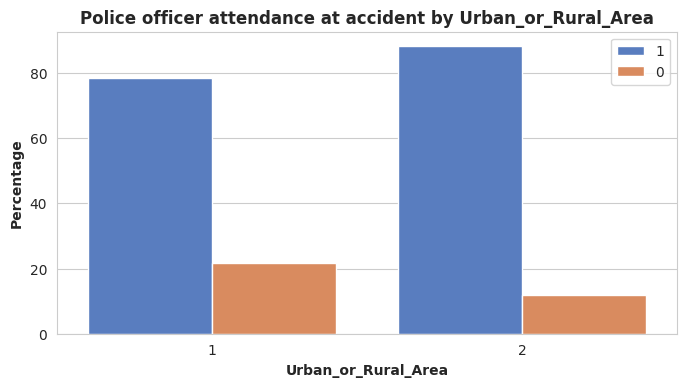

In [ ]:
categorical_target_exploration (df, 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident')

Most of 2014 accidents happened in urban area but accidents in rural area are more attended

### Multivariate analysis

Numeric-Numeric variables

In [ ]:
df_num = df[['Number_of_Vehicles','Number_of_Casualties']]

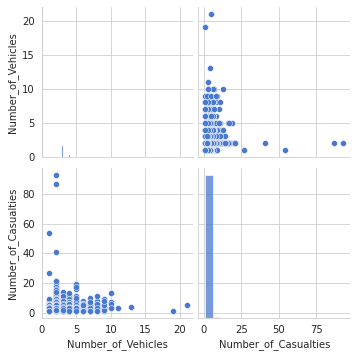

In [ ]:
sns.pairplot(df_num, vars = df_num.columns)

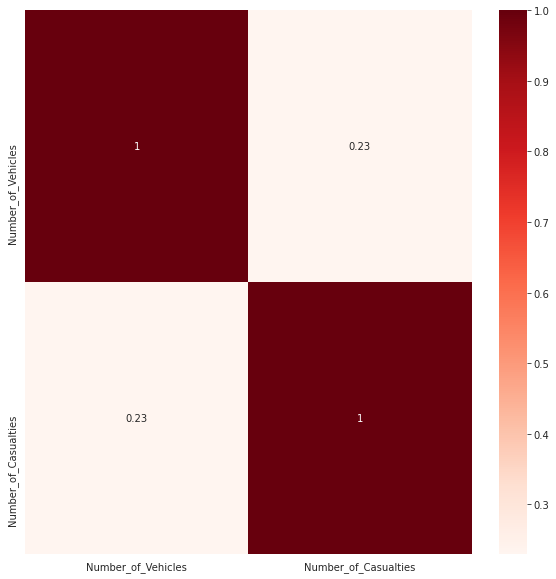

In [ ]:
c = df_num.corr()
plt.figure(figsize = (10,10))
sns.heatmap(c, annot = True, cmap = 'Reds')

I expected that these two variables would be much more correlated

Numerical - Categorical

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


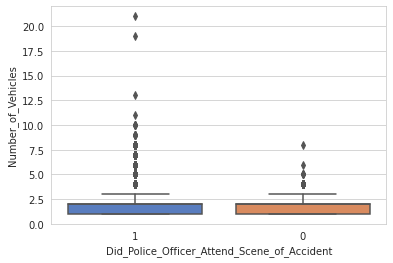

In [ ]:
def num_cat_analysis (df, cat_feature, num_feature):
  sns.boxplot(df[cat_feature], df[num_feature])

num_cat_analysis(df, 'Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Vehicles')

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


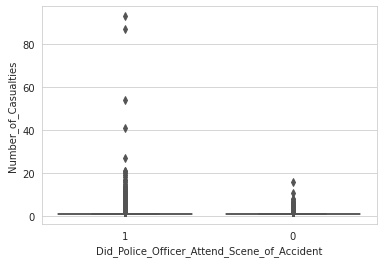

In [ ]:
num_cat_analysis(df, 'Did_Police_Officer_Attend_Scene_of_Accident','Number_of_Casualties')

As already said, need to create a categorical to use these variables

## **Prepare the data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146320 entries, 0 to 146321
Data columns (total 22 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Longitude                                    146320 non-null  float64       
 1   Latitude                                     146320 non-null  float64       
 2   Police_Force                                 146320 non-null  category      
 3   Accident_Severity                            146320 non-null  category      
 4   Number_of_Vehicles                           146320 non-null  int64         
 5   Number_of_Casualties                         146320 non-null  int64         
 6   Date                                         146320 non-null  datetime64[ns]
 7   Day_of_Week                                  146320 non-null  category      
 8   Time                                         146320 non-null  ob

### Feature engineering


New categorical feature from numerical Number_of_Casualties

Number of unique values of Casualties
3


Frequency of Casualties
1      114479
2       21867
>=3      9974
Name: Casualties, dtype: int64


Relative Frequency of Casualties
1      0.782388
2      0.149446
>=3    0.068166
Name: Casualties, dtype: float64


Null values 0
Percentage of Null Values 0.0




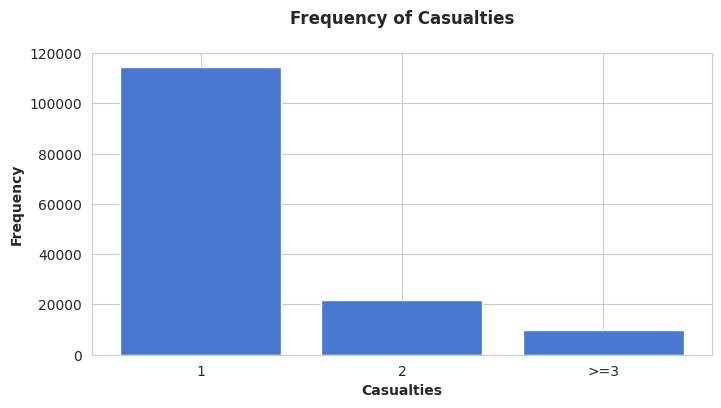

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Casualties                                               
1                                            79.30  20.70
2                                            88.92  11.08
>=3                                          93.99   6.01





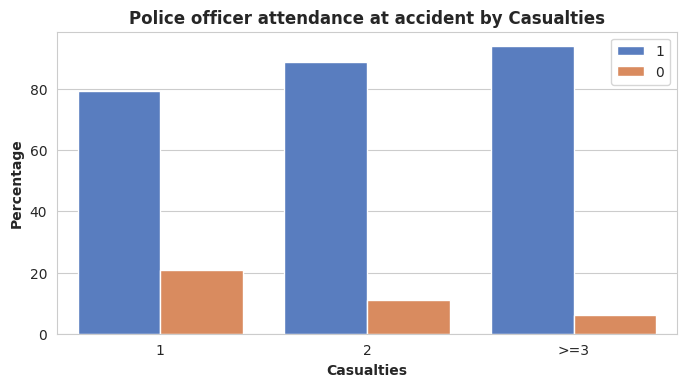

In [ ]:
df['Casualties'] = ['1' if x == 1 else '2' if x == 2 else '>=3' for x in df['Number_of_Casualties']]
categorical_feature_exploration(df['Casualties'])
categorical_target_exploration(df,'Casualties','Did_Police_Officer_Attend_Scene_of_Accident')

New categorical feature for Vehicles

Number of unique values of Involved_Vehicles
4


Frequency of Involved_Vehicles
2      88592
1      43169
3      11329
>=4     3230
Name: Involved_Vehicles, dtype: int64


Relative Frequency of Involved_Vehicles
2      0.605467
1      0.295031
3      0.077426
>=4    0.022075
Name: Involved_Vehicles, dtype: float64


Null values 0
Percentage of Null Values 0.0




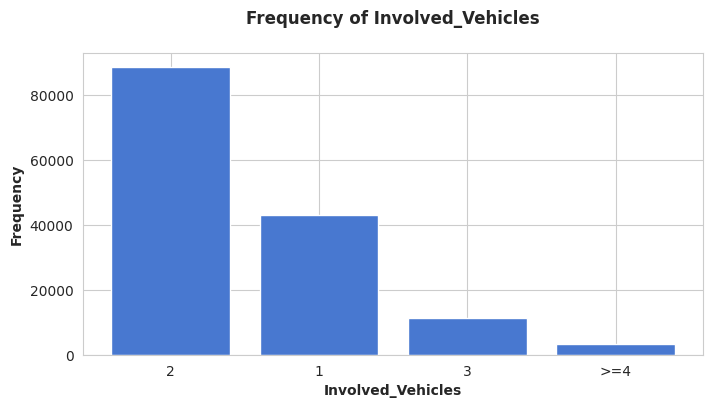

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Involved_Vehicles                                        
1                                            83.12  16.88
2                                            79.20  20.80
3                                            92.02   7.98
>=4                                          97.03   2.97





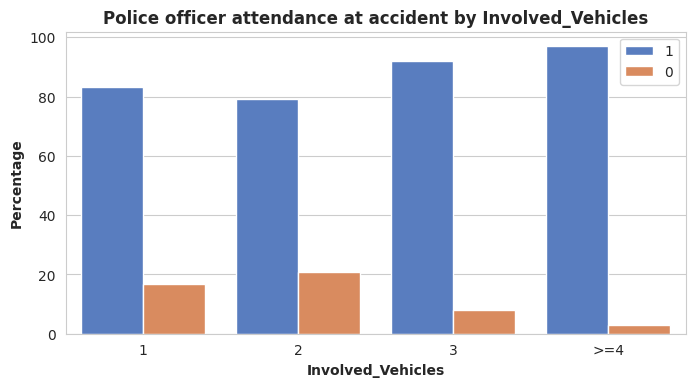

In [ ]:
df['Involved_Vehicles'] = ['1' if x == 1 else '2' if x == 2 else '3' if x ==3 else '>=4' for x in df['Number_of_Vehicles']]
categorical_feature_exploration(df['Involved_Vehicles'])
categorical_target_exploration(df,'Involved_Vehicles','Did_Police_Officer_Attend_Scene_of_Accident')

New categorical feature to know if the Accident happened in the Morning, Afternoon or Evening

In [ ]:
df['Month'] = [x.month for x in df['Date']]
df['Hour'] = [x.hour for x in df['Time']]

Number of unique values of Part_of_Day
3


Frequency of Part_of_Day
Afternoon    63394
Morning      59830
Night        23096
Name: Part_of_Day, dtype: int64


Relative Frequency of Part_of_Day
Afternoon    0.433256
Morning      0.408898
Night        0.157846
Name: Part_of_Day, dtype: float64


Null values 0
Percentage of Null Values 0.0




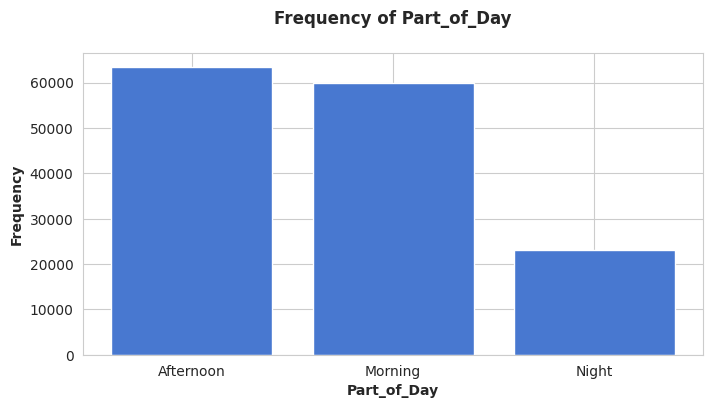

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Part_of_Day                                              
Afternoon                                    80.28  19.72
Morning                                      81.23  18.77
Night                                        87.09  12.91





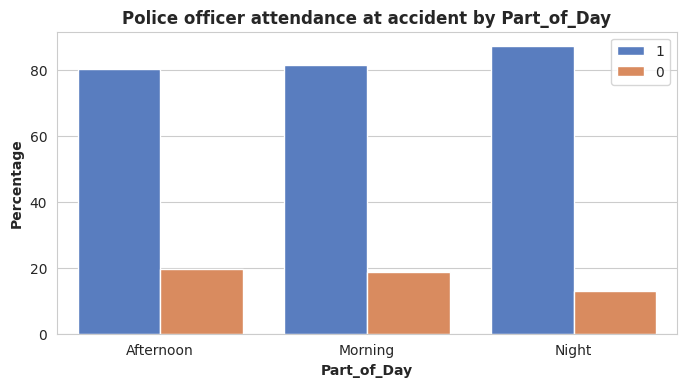

In [ ]:
df['Part_of_Day'] = np.where((df['Hour'] > 5) & (df['Hour']<= 13),'Morning', 
                                  np.where((df['Hour'] > 13) & (df['Hour']<= 19),'Afternoon',
                                  np.where((df['Hour']  > 19) | (df['Hour']  <= 5),'Night', 'None')))

df['Part_of_Day'].value_counts()
categorical_feature_exploration(df['Part_of_Day'])
categorical_target_exploration(df,'Part_of_Day','Did_Police_Officer_Attend_Scene_of_Accident')

New categorical feature to know the season of the accidents

Number of unique values of Part_of_Year
4


Frequency of Part_of_Year
Autumn    38730
Summer    36966
Spring    35843
Winter    34781
Name: Part_of_Year, dtype: int64


Relative Frequency of Part_of_Year
Autumn    0.264694
Summer    0.252638
Spring    0.244963
Winter    0.237705
Name: Part_of_Year, dtype: float64


Null values 0
Percentage of Null Values 0.0




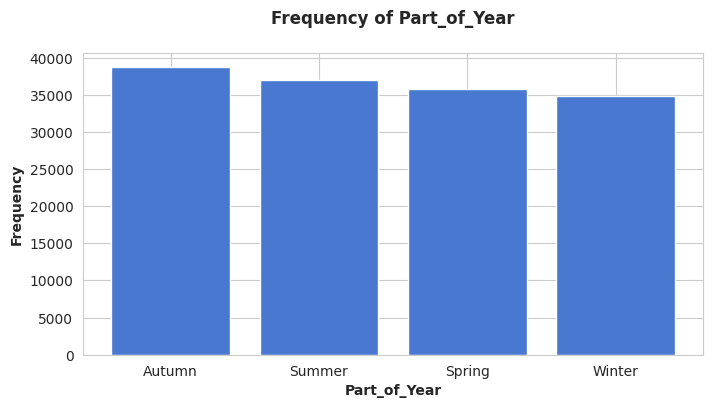

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Part_of_Year                                             
Autumn                                       81.77  18.23
Spring                                       81.84  18.16
Summer                                       82.55  17.45
Winter                                       80.75  19.25





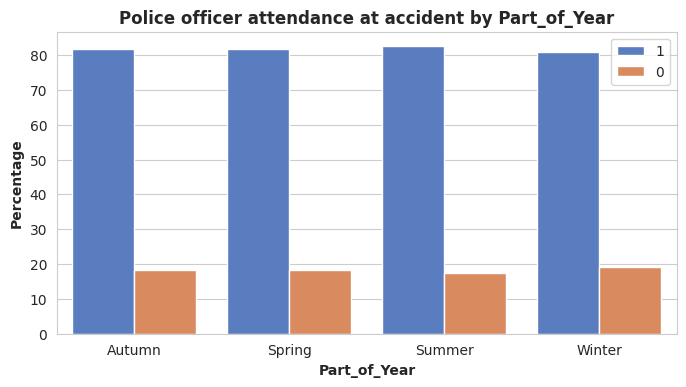

In [ ]:
df['Part_of_Year'] = np.where((df['Month'] >= 1) & (df['Month']<= 3),'Winter', 
                                  np.where((df['Month'] >= 4) & (df['Month']<= 6),'Spring',
                                  np.where((df['Month'] >= 7) & (df['Month']<= 9),'Summer', 'Autumn')))

categorical_feature_exploration(df['Part_of_Year'])
categorical_target_exploration(df,'Part_of_Year','Did_Police_Officer_Attend_Scene_of_Accident')

New categorical feature to group the different kind of weather in good or bad

Number of unique values of Good_Bad_Weather
3


Frequency of Good_Bad_Weather
Fine             120452
Bad               21056
Other/Unknown      4812
Name: Good_Bad_Weather, dtype: int64


Relative Frequency of Good_Bad_Weather
Fine             0.823209
Bad              0.143904
Other/Unknown    0.032887
Name: Good_Bad_Weather, dtype: float64


Null values 0
Percentage of Null Values 0.0




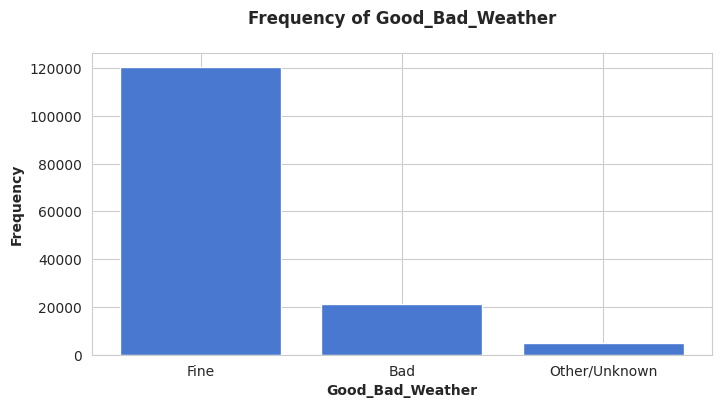

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Good_Bad_Weather                                         
Bad                                          86.00  14.00
Fine                                         81.81  18.19
Other/Unknown                                61.28  38.72





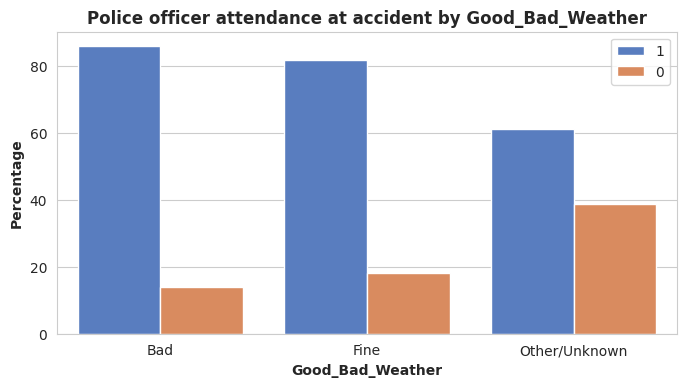

In [ ]:
Good_Bad_Weather = {1: 'Fine', 4: 'Fine', 2: 'Bad', 3: 'Bad', 5: 'Bad', 6:'Bad', 7:'Bad', 8:'Other/Unknown', 9:'Other/Unknown'}
df['Good_Bad_Weather'] = df['Weather_Conditions'].map(Good_Bad_Weather)
categorical_feature_exploration(df['Good_Bad_Weather'])
categorical_target_exploration(df,'Good_Bad_Weather','Did_Police_Officer_Attend_Scene_of_Accident')

New categorical feature to distinguish if it was light or dark

Number of unique values of Light_Dark_Condition
2


Frequency of Light_Dark_Condition
Light    108071
Dark      38249
Name: Light_Dark_Condition, dtype: int64


Relative Frequency of Light_Dark_Condition
Light    0.738593
Dark     0.261407
Name: Light_Dark_Condition, dtype: float64


Null values 0
Percentage of Null Values 0.0




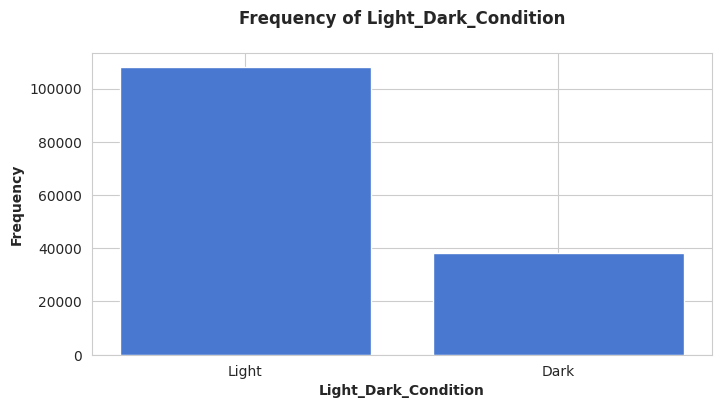

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Light_Dark_Condition                                     
Dark                                         84.66  15.34
Light                                        80.71  19.29





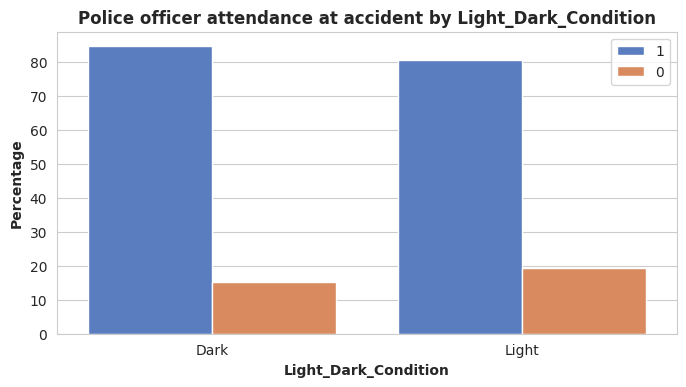

In [ ]:
Light_Dark_Condition = {1: 'Light', 4: 'Dark', 5: 'Dark', 6: 'Dark', 7: 'Dark'}
df['Light_Dark_Condition'] = df['Light_Conditions'].map(Light_Dark_Condition)
categorical_feature_exploration(df['Light_Dark_Condition'])
categorical_target_exploration(df,'Light_Dark_Condition','Did_Police_Officer_Attend_Scene_of_Accident')

New categorical feature to group weekend and week days

Number of unique values of Week_Day
2


Frequency of Week_Day
Weekdays    111359
Weekend      34961
Name: Week_Day, dtype: int64


Relative Frequency of Week_Day
Weekdays    0.761065
Weekend     0.238935
Name: Week_Day, dtype: float64


Null values 0
Percentage of Null Values 0.0




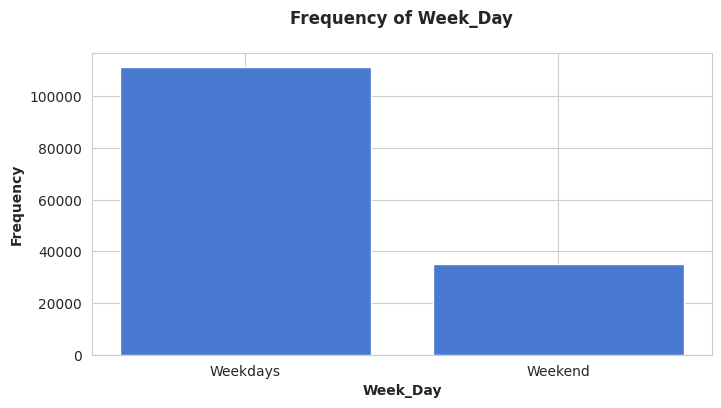

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Week_Day                                                 
Weekdays                                     80.87  19.13
Weekend                                      84.51  15.49





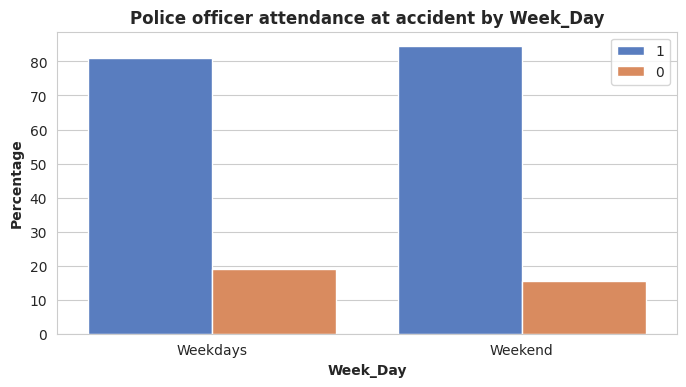

In [ ]:
Week_Day = {1: 'Weekend', 7: 'Weekend', 2: 'Weekdays', 3: 'Weekdays', 4: 'Weekdays', 5: 'Weekdays', 6: 'Weekdays'}
df['Week_Day'] = df['Day_of_Week'].map(Week_Day)
categorical_feature_exploration(df['Week_Day'])
categorical_target_exploration(df,'Week_Day','Did_Police_Officer_Attend_Scene_of_Accident')

New categorical feature to distinguish if there are or not pedastrian facilities

Number of unique values of Pedastrian_Facilities
2


Frequency of Pedastrian_Facilities
No_Facilities    118106
Facilities        28214
Name: Pedastrian_Facilities, dtype: int64


Relative Frequency of Pedastrian_Facilities
No_Facilities    0.807176
Facilities       0.192824
Name: Pedastrian_Facilities, dtype: float64


Null values 0
Percentage of Null Values 0.0




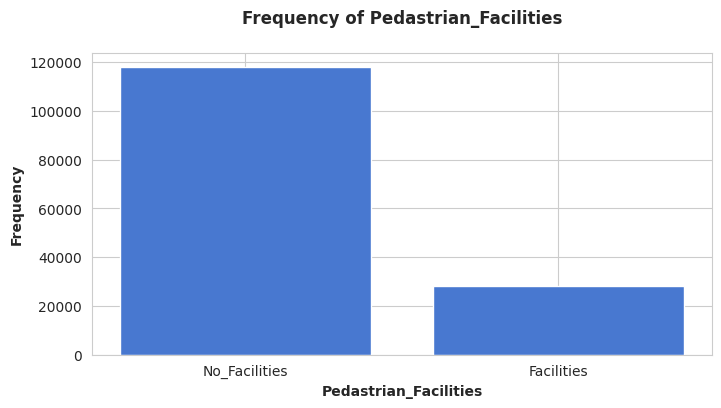

Did_Police_Officer_Attend_Scene_of_Accident     1     0
Pedastrian_Facilities                                  
Facilities                                   79.4  20.6
No_Facilities                                82.3  17.7





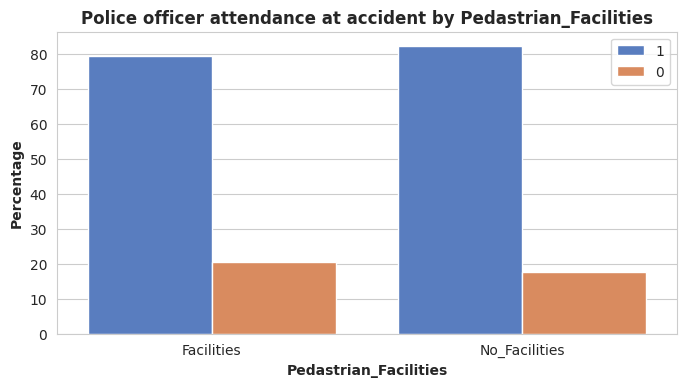

In [ ]:
Pedastrian_Facilities = {1: 'Facilities', 4: 'Facilities', 5: 'Facilities', 7: 'Facilities', 8: 'Facilities', 0: 'No_Facilities'}
df['Pedastrian_Facilities'] = df['Pedestrian_Crossing-Physical_Facilities'].map(Pedastrian_Facilities)
categorical_feature_exploration(df['Pedastrian_Facilities'])
categorical_target_exploration(df,'Pedastrian_Facilities','Did_Police_Officer_Attend_Scene_of_Accident')

New feature to discern if there is or not a junction

Number of unique values of Junction
2


Frequency of Junction
Junction       89912
No_Junction    56408
Name: Junction, dtype: int64


Relative Frequency of Junction
Junction       0.614489
No_Junction    0.385511
Name: Junction, dtype: float64


Null values 0
Percentage of Null Values 0.0




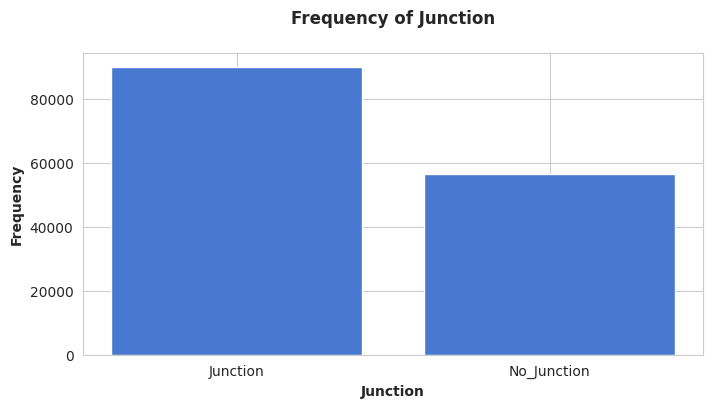

Did_Police_Officer_Attend_Scene_of_Accident      1      0
Junction                                                 
Junction                                     80.52  19.48
No_Junction                                  83.69  16.31





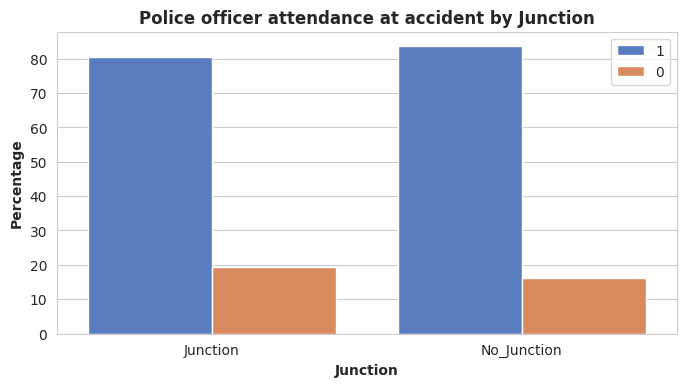

In [ ]:
Junction = {0: 'No_Junction', 1: 'Junction', 2: 'Junction', 3: 'Junction', 5: 'Junction',
            6: 'Junction', 7: 'Junction', 8: 'Junction', 9: 'Junction'}
df['Junction'] = df['Junction_Detail'].map(Junction)
categorical_feature_exploration(df['Junction'])
categorical_target_exploration(df,'Junction','Did_Police_Officer_Attend_Scene_of_Accident')

In [ ]:
# This are two other variables I could also create, but I want to try to leave the original one 
#with the detail they provide that could be useful

#Carriageway = {2: 'One way', 3: 'Dual', 1: 'Other', 6: 'Other', 7: 'Other', 9: 'UnKnown', 12: 'One way'}
#df['Carriageway'] = df['Road_Type'].map(Carriageway)
#Road_Class = {1: 'Motorway', 2: 'Motorway', 3: 'NonMotorway', 4: 'NonMotorway', 5: 'NonMotorway', 6:'Unclassified'}
#df['Motorway'] = df['1st_Road_Class'].map(Road_Class)


#### Geo variables creation

Text(0.5, 1.0, 'Latitude-Longitude Accident Distribution')

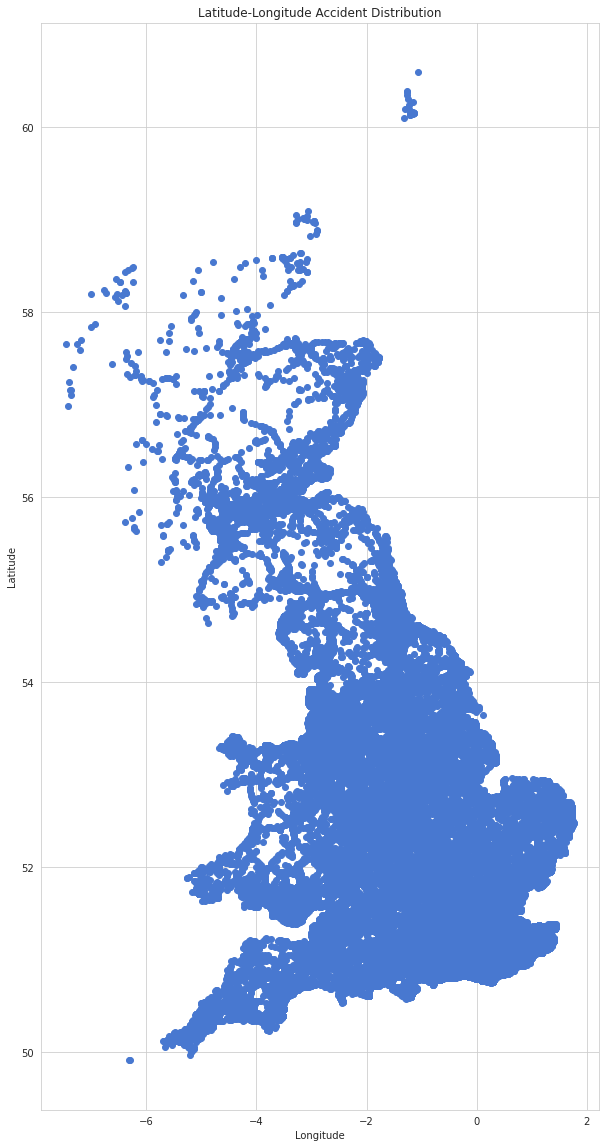

In [ ]:
plt.figure(figsize=(10,20))
plt.scatter(df['Longitude'], df['Latitude'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Latitude-Longitude Accident Distribution')

Cluster the geo data, to find some areas, but how many? Let's find it with elbow analysis

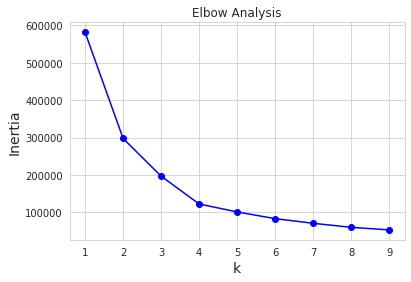

In [ ]:
from sklearn.cluster import KMeans
X = df[['Latitude','Longitude']]
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("k", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title('Elbow Analysis')
plt.show()

The elbow is for k = 4, create new feature to identify geo area

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Geo_cluster']  = kmeans.fit_predict(df[['Latitude','Longitude']])

Have a look at the map, to check if clustering make sense

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Geo clusters')

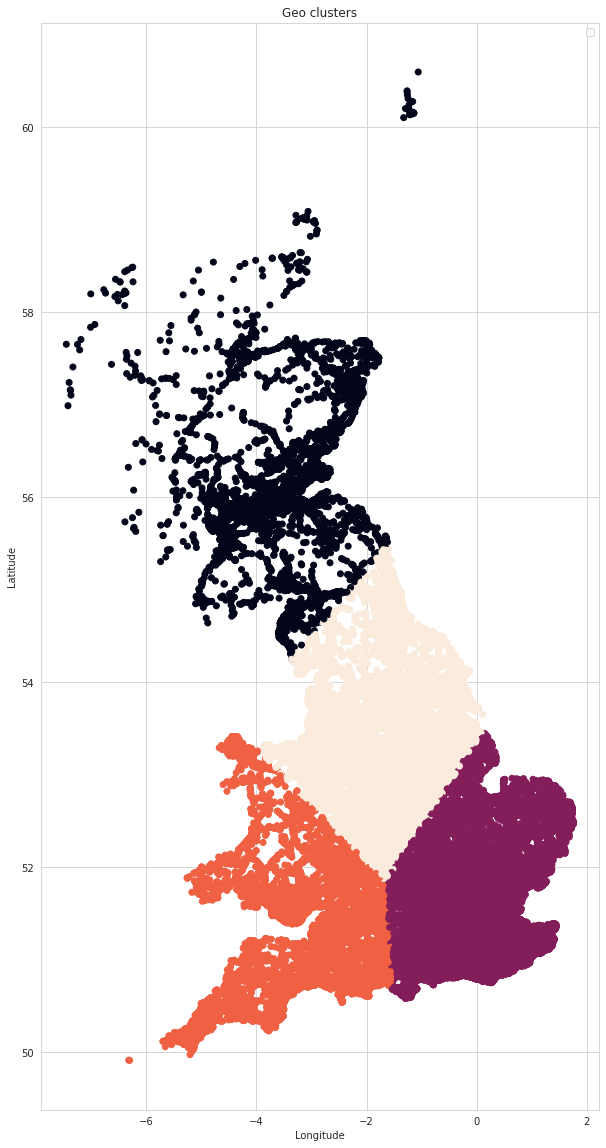

In [ ]:
plt.figure(figsize=(10,20))

plt.scatter(df['Longitude'], df['Latitude'], c = df['Geo_cluster'])
plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geo clusters')


### Dataset for the model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146320 entries, 0 to 146321
Data columns (total 34 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Longitude                                    146320 non-null  float64       
 1   Latitude                                     146320 non-null  float64       
 2   Police_Force                                 146320 non-null  category      
 3   Accident_Severity                            146320 non-null  category      
 4   Number_of_Vehicles                           146320 non-null  int64         
 5   Number_of_Casualties                         146320 non-null  int64         
 6   Date                                         146320 non-null  datetime64[ns]
 7   Day_of_Week                                  146320 non-null  category      
 8   Time                                         146320 non-null  ob

In [ ]:
#drop latitude and longitude
df.drop(['Latitude', 'Longitude' ], axis = 1, inplace = True)

In [ ]:
#drop date and time original variables
df.drop('Date', axis = 1, inplace = True)
df.drop('Time', axis = 1, inplace = True)

In [ ]:
#drop the variables that I replaced with a better ones
df.drop([ 'Hour','Month','Light_Conditions','Weather_Conditions',
          'Day_of_Week', 'Pedestrian_Crossing-Physical_Facilities','Junction_Detail',
          'Number_of_Vehicles', 'Number_of_Casualties'], axis = 1, inplace = True)

In [ ]:
#little information in the following variables, due to strong imbalance, drop them
df.drop(['Pedestrian_Crossing-Human_Control','Carriageway_Hazards', 'Special_Conditions_at_Site'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146320 entries, 0 to 146321
Data columns (total 18 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   Police_Force                                 146320 non-null  category
 1   Accident_Severity                            146320 non-null  category
 2   1st_Road_Class                               146320 non-null  category
 3   Road_Type                                    146320 non-null  category
 4   Speed_limit                                  146320 non-null  category
 5   Road_Surface_Conditions                      146320 non-null  category
 6   Urban_or_Rural_Area                          146320 non-null  category
 7   Did_Police_Officer_Attend_Scene_of_Accident  146320 non-null  category
 8   Casualties                                   146320 non-null  object  
 9   Involved_Vehicles                            146

Encoding of the categorical variables

In [ ]:
#convert all variables to object type
df['Geo_cluster'] = df['Geo_cluster'].astype('object')

#consider the speed limit also as a categorical
df_target = df['Did_Police_Officer_Attend_Scene_of_Accident']
df_cat = df.drop(['Did_Police_Officer_Attend_Scene_of_Accident'], axis = 1)

#get dummies
df_cat_dummies = pd.get_dummies(df_cat)
df_cat_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146320 entries, 0 to 146321
Columns: 108 entries, Police_Force_1 to Geo_cluster_3
dtypes: uint8(108)
memory usage: 21.2 MB


Re-create the full dataset (here is not necessary but it's useful if there was also numeric features)

In [ ]:
df_prepared = df_cat_dummies.join(df_target)
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146320 entries, 0 to 146321
Columns: 109 entries, Police_Force_1 to Did_Police_Officer_Attend_Scene_of_Accident
dtypes: category(1), uint8(108)
memory usage: 21.3 MB


In [ ]:
df_prepared.head()

,Police_Force_1,Police_Force_3,Police_Force_4,Police_Force_5,Police_Force_6,Police_Force_7,Police_Force_10,Police_Force_11,Police_Force_12,Police_Force_13,Police_Force_14,Police_Force_16,Police_Force_17,Police_Force_20,Police_Force_21,Police_Force_22,Police_Force_23,Police_Force_30,Police_Force_31,Police_Force_32,Police_Force_33,Police_Force_34,Police_Force_35,Police_Force_36,Police_Force_37,Police_Force_40,Police_Force_41,Police_Force_42,Police_Force_43,Police_Force_44,Police_Force_45,Police_Force_46,Police_Force_47,Police_Force_48,Police_Force_50,Police_Force_52,Police_Force_53,Police_Force_54,Police_Force_55,Police_Force_60,...,Speed_limit_50,Speed_limit_60,Speed_limit_70,Road_Surface_Conditions_1,Road_Surface_Conditions_2,Road_Surface_Conditions_3,Road_Surface_Conditions_4,Road_Surface_Conditions_5,Urban_or_Rural_Area_1,Urban_or_Rural_Area_2,Casualties_1,Casualties_2,Casualties_>=3,Involved_Vehicles_1,Involved_Vehicles_2,Involved_Vehicles_3,Involved_Vehicles_>=4,Part_of_Day_Afternoon,Part_of_Day_Morning,Part_of_Day_Night,Part_of_Year_Autumn,Part_of_Year_Spring,Part_of_Year_Summer,Part_of_Year_Winter,Good_Bad_Weather_Bad,Good_Bad_Weather_Fine,Good_Bad_Weather_Other/Unknown,Light_Dark_Condition_Dark,Light_Dark_Condition_Light,Week_Day_Weekdays,Week_Day_Weekend,Pedastrian_Facilities_Facilities,Pedastrian_Facilities_No_Facilities,Junction_Junction,Junction_No_Junction,Geo_cluster_0,Geo_cluster_1,Geo_cluster_2,Geo_cluster_3,Did_Police_Officer_Attend_Scene_of_Accident
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1


### **Create train and test**

Get the X and the label from the data

In [ ]:
target = df_prepared['Did_Police_Officer_Attend_Scene_of_Accident']

In [ ]:
X = df_prepared.drop('Did_Police_Officer_Attend_Scene_of_Accident', axis = 1)
X.shape

(146320, 108)

In [ ]:
target.value_counts(normalize = True)

1    0.817421
0    0.182579
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

The target variable is quite imbalanced

Divide the train and the test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.20, random_state = 42, stratify = target)

In [ ]:
print('train shape', X_train.shape)
print('test shape', X_test.shape)

train shape (117056, 108)
test shape (29264, 108)


## **Explore different models**

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, classification_report, recall_score, precision_recall_curve, f1_score, roc_auc_score, accuracy_score

Function to evaluate the results on the training set and on the test set

In [ ]:
def evaluate(y_train, y_train_pred, y_test, y_test_pred):
    ''' Show the results of the classification on training and test set'''
    print(f"** F1 Score **")
    print(f"Baseline - all ones: {f1_score(y_test, np.ones(y_test.shape[0])):0.3f}")
    print(f"Train: {f1_score(y_train, y_train_pred):0.3f}")
    print(f"Test: {f1_score(y_test, y_test_pred):0.3f}\n")

    print(f"** Accuracy **")
    print(f"Baseline - all ones: {accuracy_score(y_test, np.ones(y_test.shape[0])):0.3f}")
    print(f"Train: {accuracy_score(y_train, y_train_pred):0.3f}")
    print(f"Test: {accuracy_score(y_test, y_test_pred):0.3f}")

    print("Test Confusion Matrix")
    print(confusion_matrix(y_test, y_test_pred))

    print("\nTest Classification Report")
    print(classification_report(y_test, y_test_pred))

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression(random_state = 42, max_iter = 500)
logistic_reg.fit(X_train, y_train)
y_train_pred = logistic_reg.predict(X_train) 
y_test_pred = logistic_reg.predict(X_test) 

evaluate(y_train, y_train_pred, y_test, y_test_pred)

** F1 Score **
Baseline - all ones: 0.900
Train: 0.900
Test: 0.900

** Accuracy **
Baseline - all ones: 0.817
Train: 0.820
Test: 0.820
Test Confusion Matrix
[[  271  5072]
 [  203 23718]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.57      0.05      0.09      5343
           1       0.82      0.99      0.90     23921

    accuracy                           0.82     29264
   macro avg       0.70      0.52      0.50     29264
weighted avg       0.78      0.82      0.75     29264



#### Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train) 
y_test_pred = tree.predict(X_test) 

evaluate(y_train, y_train_pred, y_test, y_test_pred)

** F1 Score **
Baseline - all ones: 0.900
Train: 0.961
Test: 0.842

** Accuracy **
Baseline - all ones: 0.817
Train: 0.936
Test: 0.742
Test Confusion Matrix
[[ 1520  3823]
 [ 3741 20180]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.29      0.28      0.29      5343
           1       0.84      0.84      0.84     23921

    accuracy                           0.74     29264
   macro avg       0.56      0.56      0.56     29264
weighted avg       0.74      0.74      0.74     29264



Performance decreses on the test set, the tree overfits the training data

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(random_state = 42, n_jobs = -1)
RandomForest.fit(X_train, y_train)
y_train_pred = RandomForest.predict(X_train) 
y_test_pred = RandomForest.predict(X_test) 

evaluate(y_train, y_train_pred, y_test, y_test_pred)

** F1 Score **
Baseline - all ones: 0.900
Train: 0.962
Test: 0.886

** Accuracy **
Baseline - all ones: 0.817
Train: 0.936
Test: 0.801
Test Confusion Matrix
[[  788  4555]
 [ 1276 22645]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.38      0.15      0.21      5343
           1       0.83      0.95      0.89     23921

    accuracy                           0.80     29264
   macro avg       0.61      0.55      0.55     29264
weighted avg       0.75      0.80      0.76     29264



Have a look at the feature importance, it could be useful for the next pass

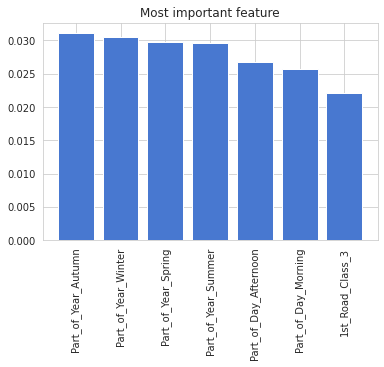

In [ ]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'FeatureImportance': RandomForest.feature_importances_
})
importances = importances.sort_values(by='FeatureImportance', ascending=False)
filtered_importances = importances[importances.FeatureImportance>=0.02]
plt.bar(x=filtered_importances['Attribute'], height=filtered_importances['FeatureImportance'])
plt.title('Most important feature')
plt.xticks(rotation='vertical')
plt.show()

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GradBoosting = GradientBoostingClassifier(random_state = 42)
GradBoosting.fit(X_train, y_train)
y_train_pred = GradBoosting.predict(X_train) 
y_test_pred = GradBoosting.predict(X_test) 

evaluate(y_train, y_train_pred, y_test, y_test_pred)

** F1 Score **
Baseline - all ones: 0.900
Train: 0.901
Test: 0.901

** Accuracy **
Baseline - all ones: 0.817
Train: 0.821
Test: 0.821
Test Confusion Matrix
[[  174  5169]
 [   65 23856]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.73      0.03      0.06      5343
           1       0.82      1.00      0.90     23921

    accuracy                           0.82     29264
   macro avg       0.77      0.51      0.48     29264
weighted avg       0.80      0.82      0.75     29264



####CatBoost

In [ ]:
from catboost import CatBoostClassifier
cat_boost= CatBoostClassifier(random_state = 42, verbose = False)
cat_boost.fit(X_train, y_train)
y_train_pred = cat_boost.predict(X_train) 
y_test_pred = cat_boost.predict(X_test) 

evaluate(y_train, y_train_pred, y_test, y_test_pred)

** F1 Score **
Baseline - all ones: 0.900
Train: 0.905
Test: 0.900

** Accuracy **
Baseline - all ones: 0.817
Train: 0.830
Test: 0.820
Test Confusion Matrix
[[  339  5004]
 [  270 23651]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.56      0.06      0.11      5343
           1       0.83      0.99      0.90     23921

    accuracy                           0.82     29264
   macro avg       0.69      0.53      0.51     29264
weighted avg       0.78      0.82      0.76     29264



#### Oversample the dataset

Try the Random Forest on the oversampled dataset since the label is imbalanced

In [ ]:
from imblearn.over_sampling import RandomOverSampler
RandomOverSampl = RandomOverSampler(random_state = 42)
X_train_resampled, y_train_resampled = RandomOverSampl.fit_resample(X_train, y_train)
print(X_train_resampled.shape)
print(pd.Series(y_train_resampled).value_counts(normalize = True))

(191368, 108)
1    0.5
0    0.5
dtype: float64


The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(random_state = 42, n_jobs = -1)
RandomForest.fit(X_train_resampled, y_train_resampled)
y_train_resampled_pred = RandomForest.predict(X_train_resampled) 
y_test_pred = RandomForest.predict(X_test) 

evaluate(y_train_resampled, y_train_resampled_pred, y_test, y_test_pred)

** F1 Score **
Baseline - all ones: 0.900
Train: 0.918
Test: 0.833

** Accuracy **
Baseline - all ones: 0.817
Train: 0.922
Test: 0.732
Test Confusion Matrix
[[ 1894  3449]
 [ 4385 19536]]

Test Classification Report
              precision    recall  f1-score   support

           0       0.30      0.35      0.33      5343
           1       0.85      0.82      0.83     23921

    accuracy                           0.73     29264
   macro avg       0.58      0.59      0.58     29264
weighted avg       0.75      0.73      0.74     29264



Performance decreases with oversampling, with more time I should try some other techniques

If I had time I'd start the second pass, for example to find new useful features, because I'm not satisfied with this performances. 

Because of time constraints, I suppose that I'm satisfied with the CatBoost because:
* it slightly exceed the baseline
* it doesn't overfit the training 


## **Fine-tune of the most performing models**

I usually fine-tune the most performing model, in this case the CatBoost

CatBoost hyperparameter tuning with Random Grid Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Most important parameters that always move together
learning_rate = [0.15,0.1,0.05,0.01,0.005,0.001] 
n_estimators = [50, 100, 150, 200, 250]

# Create the random grid
random_grid = {'learning_rate': learning_rate,
              'n_estimators': n_estimators}


CatBoost_RandomSearch = RandomizedSearchCV(cat_boost, param_distributions = random_grid, cv = 3, n_iter = 100, random_state = 42, scoring = 'f1')
#Comment because too long!
#CatBoost_RandomSearch.fit(X_train, y_train)


In [ ]:
#print(CatBoost_RandomSearch.best_params_)
#print(CatBoost_RandomSearch.best_score_)


I'd like to try more hyperparameters such as the maximum number of levels in tree, the minimum number of training samples in a leaf, the maximum number of leafs in the resulting tree but it takes too long, because it would be an iterative process, according to the results I'd repeat and re-adjust the hyperparameters ranges

Then I'd also try a grid search on the most promising range of attributes that I got on the random search

## **Explain the results**

Shap values

In [ ]:
import shap 

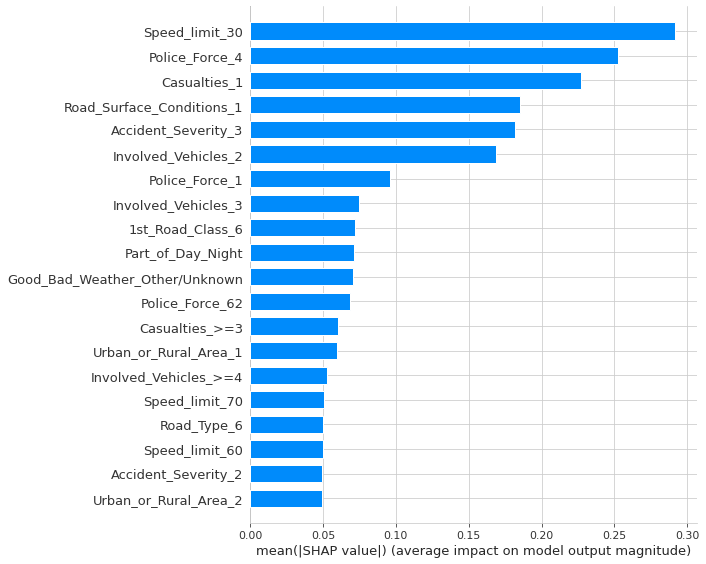

In [ ]:
explainer = shap.TreeExplainer(cat_boost) #the model should be the best estimator of grid search
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

From the above chart we can see the columns that most contribute to the model: Speed_limit_30, Police_Force_4, Casualties_1, etc...

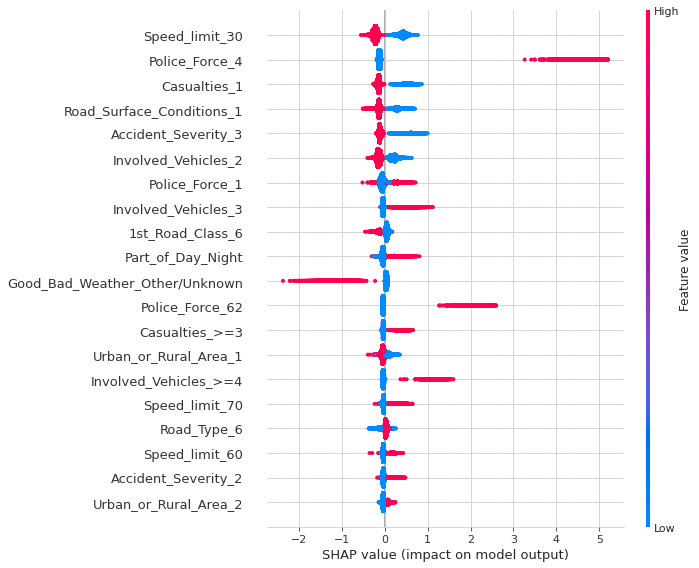

In [ ]:
shap.summary_plot(shap_values, X_train)

Speed_limit_30 provides the most amount of information that is accountable for in the prediction, if the speed limit is 1 (red) the police officier won't attend. On the other hand, if the speed limit is not 30, the police officier is likely to attend.

The column Police_Force_4 provides a lot of information and if it is 1 indicate a strong positive impact on the model output, in the sense that the police officier of police force 4 is likely to attend.

The column casualities_1 also shows a clear relationship: only 1 casualties indicate a negative impact on the model output, in the sense that the police officier is not likely to attend.

## **Evaluation on the test set**

If I had a different test set (like in most of competitions), I'd evaluate here after the choise of the final model. I could have kept it from the dataset, but I didn't want to do without some useful data for the training

## **Final Report**

### What was approach taken (e.g. algorithms and tools)?

This is the approach taken to develop this project:


1.   **Frame the problem** searching on the website and reading the available documentation 
2.   **Get the data** importing them on Google Colab to have more computational resources and an interactive notebook
3. **Explore the data** to gain insights about the variables and their relation to the target variable
4. **Prepare the data** mainly applying data cleaning, features selection and features engineering
5. **Explore different models** from different categories in a 'quick and dirty way' using standard parameters and compare their performances, analyse the feature importance and the type of error they make
6. **Fine-tune** the top performing models of the previous step and identify the final model
7. **Explain the results** using permutation importance and shap values



###  What were the main challenges?

The main challenges I faced are the following:


1. Only **two evenings** to understand the data, create a model and present it
2. Working on Colab with a **poor connection**
3. Including the **geographical features** in a correct way, that I managed introducing clustering to find geographical areas





### What insight did you gain from working with the data?

The paragraphs *Explore data* and *Feature engineering* are full of insights, for example:
* Only the 15% of 2014 accidents happened during the night
* Unexpectedly the Number of Vehicles is slightly correlated to Number of Casualties, only 0.23
* Sunday is the day of the week when more accidents happened in 2014
* The police officier attended more incidents on percentage in 2014 if they are fatal rather slight, if they involved many vehicles, if there are many casualties, if the road is a motorway, etc..
* the features that have more impact on the police offices presence at the accident are the following:
    * if the velocity limit is 30
    * if the Police Force is Lancashire Police
    * if the accident is slightly grave
    * if the number of casualties is only 1
    * if the road is dry
    * if it is night

I'm also afraid that it is quite hard to improve the models performance in predicting the zero class

### How useful is the model?


From the implementation perspective, I need to work more on this model to say that it's useful, mainly for two reasons:
* the accuracy exceed the baseline model that predicts all ones only slightly
* the model is not incisive in predicting when the policy officier don't attend the accident

If the model was improved, from a general perspective it could be useful to understand the main reasons that make the police officier attend the accidents. 
About the application on the real daily life, at first I think it is quite useles, also because I'm afraid it's quite hard to collect real time all these data in a accident context.
If it was possibile to have all the data real time, with a little imagination it could provide some advantages to:
* an insurance company that could predict if the police will attend the accidents and according to the prediction decide to send an insurance assessor 
* the city governmets that could predict if the police will attend the accidents and according to the prediction decide to send a traffic agent (maybe a phone call to the Police is easier!)

For these use cases it could be useful to train the model on more years data



### What might you do differently if you had more time/resource?

I'd like to:

1.   Introduce some **other features** and analyse the current ones, to improve the performance of the model, especially the prediction of 0 class, for example:
* Understand why Speed_limit_30 is so important
* Other features from the Vehicles or Casualties dataset that are available on the web-site
2. Explore **different kind of models**, for example KNN, AdaBoost
3. Analyse more carefully the **feature importance** of each model to address further feature selection and engineering
4. **Iterate** feature engineering and selection steps and the quick and dirty models phase to search for better results
5. Understand why the **oversampling** doesn't improve the performance and maybe trying some other techniques (SMOTE, ADASYN)
6. Apply the **grid search** seriously, applying at first a random search and then a more focused grid search
7. Use the **best estimator of the grid search** to explain the results instead of the default CatBoost
8. Run some models exploiting **Colab GPU**





*THANKS!*